# Description

![alt text](https://cdni.autocarindia.com/Utils/ImageResizer.ashx?n=http%3A%2F%2Fcdni.autocarindia.com%2FNews%2FTop-5-EVs-on-sale.jpg&c=0)

Retail Price of newly released cars depend on several underlying factors involved manufacturing process, quality &durability of Engine and every component used, along with brand and services offered.

In this project, we will analyse the prominent features that play major role in estimating/predicting the new car price.

# Evaluation

Various features of car has been split into two groups, a 'training set' and a 'test set'. We use this set to build our model to generate predictions for the test set.

For every new car in the test set, we must predict the MSRP (Manufacturer Suggested Retail Price) based on given features.

# DataSet

<PRE>
DESCRIPTION OF VARIABLES
1	 MRSP - Selling price of Car in dollars (**Target Variable**)
2	 EPA Fuel Economy Est - City (MPG) - Mileage in City
3	 Engine - Type of engine used in car
4	 Drivetrain - Types of drivetrain(Conveys power from the engine to wheels) used (FWD, RWD , AWD, 4WD )
5	 Passenger Capacity - Number of people who can be seated
6	 Passenger Doors - Number of doors in a car
7	 Base Curb Weight - Total weight of the vehicle in pounds
8	 Passenger Volume - Volume of space available for passengers
9	 Wheelbase (in)- Distance between the centers of the front and rear wheels
10	 Track Width Front - Distance between the centerline of two front wheels
11	 Height Overall - Overall height of the car in inches
12	 Fuel Tank Capacity, Approx(gal) - Fuel tank capacity in gallon
13	 SAE Net Torque @ RPM - Net optimum torque at a certain range of RPM
14	 Fuel System - Type of fuel injection used in car
15	 SAE Net Horsepower @ RPM - Horsepower produced at engine crankshaft(without transmission losses)
16	 Displacement - Measure of the cylinder volume swept by all of the pistons (in liters)
17	 Trans Description - Type of transmission used in car
18	 Trans Type - Number of gears in the transmission
19	 Suspension type Front - Type of Suspension used in car front wheels
20	 Suspension type Rear - Type of Suspension used in car rear wheels
21	 Air Bag Frontal Driver - Drivers Airbag(Y/N)
22	 Air Bag-Passenger Switch - Air Bag-Passenger Switch (On/Off)
23	 Air Bag Frontal Passenger - Front passenger Airbag(Y/N)
24	 Air Bag-Side Body-Front - Airbags in front side of the car(Y/N)
25	 Air Bag-Side Body-Rear - Airbags in rear side of the car(Y/N)
26	 Air Bag Side Head-Front - Side airbags to protect head for front row(Y/N)
27	 Air Bag Side Head-Rear - Side airbags to protect head for rear row(Y/N)
28	 Brakes -ABS - Is Antilock bracking system is present(Y/N)
29	 Child Safety Rear Door Locks - Child safety door locks(Y/N)
30	 Daytime Running Lights - (Y/N)
31	 Traction Control - Is TCS available (Y/N)
32	 Night Vision - Thermographic camera to increase a driver's perception in darkness (Y/N)
33	 Rollover Protection Bar - Is ROPS present (Y/N)
34	 Fog Lamps - Is fog lamps present(Y/N)
35	 Parking Aid - Senors to monitor nearby obstacles(Y/N)
36	 Tire Pressure Monitor - Y/N
37	 Back up Camera - Is reversing camera present (Y/N)
38	 Stability Control - Is ECS present (Y/N)
39	 Basic Miles/km - Warrany Kms
40	 Basic Years - Warranty years
41	 Corrosion Miles/km - Warranty against corrosion
42	 Corrosion Years - Warranty against corrosion in years
43	 Drivetrain Miles/Km - Warranty for drivetrain
44	 Drivetrain Years - Warranty for drivetrain in years
45	 Turning Diameter Curb to Curb(ft) -Diameter of the smallest circular turn by the car
46	 Front Wheel Material - Material in which wheel is made up of
47	 Stabilizer Bar Diameter - Front (in) - Diameter of the front sway bar
48	 Roadside assistance in years - Roadside assistance provided in terms of years
49	 Roadside Assistance Miles/km - Roadside assistance provided in terms of 
50	 Manufacturer - Details of manufacturing brand
51	 Model Year - Car model year
52	 Category - either Car/SUV/Van/Pickup
53	 Front Tire Width 
54	 Front Tire Aspect Ratio 
55	 Front tire speed ratings/cons-type
56	 Front tire rim size

Data set - Source: https://www.kaggle.com/prassanth/new-cars-price-2019?select=New_cars_price.csv
<PRE>

# Setup Imports and Variables

In [2]:
import pandas as pd
import numpy as np
import pylab as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC, LinearSVC
import matplotlib.gridspec as gridspec
import itertools
from sklearn.metrics import r2_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
from sklearn.decomposition import PCA
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor


import warnings
warnings.filterwarnings("ignore")


# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

ModuleNotFoundError: No module named 'mlxtend'

# Explore the Data

Read the data:

In [3]:
df = pd.read_csv('New_cars_cleaned.csv')
df.head()

,MSRP,EPA Fuel Economy Est - City (MPG),Engine,Drivetrain,Passenger Capacity,Passenger Doors,Base Curb Weight (lbs),Passenger Volume (ft³),Wheelbase (in),"Track Width, Front (in)",...,Stabilizer Bar Diameter - Front (in),Roadside Assistance Years,Roadside Assistance Miles/km,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio,Front tire speed ratings/cons.type,Front tire rim size
0,40600.0,22.0,l4,FWD,5,4,3790.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0
1,45500.0,22.0,l4,FWD,5,4,3829.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0
2,43600.0,22.0,l4,FWD,5,4,3821.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,255,45.0,V,20.0
3,37400.0,22.0,l4,FWD,5,4,3783.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0
4,42600.0,21.0,l4,AWD,5,4,4026.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0


In [4]:
df.tail()

,MSRP,EPA Fuel Economy Est - City (MPG),Engine,Drivetrain,Passenger Capacity,Passenger Doors,Base Curb Weight (lbs),Passenger Volume (ft³),Wheelbase (in),"Track Width, Front (in)",...,Stabilizer Bar Diameter - Front (in),Roadside Assistance Years,Roadside Assistance Miles/km,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio,Front tire speed ratings/cons.type,Front tire rim size
32311,45700.0,22.0,l4,AWD,5,4,3920.0,93.0,109.2,62.1,...,NaN,4.0,150000.0,Volvo,2018,Car,235,50.0,V,18.0
32312,41200.0,20.0,l5,AWD,5,4,3602.0,93.0,109.3,62.1,...,NaN,4.0,150000.0,Volvo,2016,Car,235,50.0,V,18.0
32313,44850.0,20.0,l5,AWD,5,4,3602.0,93.0,109.3,62.1,...,NaN,4.0,150000.0,Volvo,2016,Car,235,50.0,V,18.0
32314,41000.0,20.0,l5,AWD,5,4,3602.0,93.0,109.3,62.1,...,NaN,4.0,150000.0,Volvo,2015,Car,235,50.0,V,18.0
32315,44650.0,20.0,l5,AWD,5,4,3602.0,93.0,109.3,62.1,...,NaN,4.0,150000.0,Volvo,2015,Car,235,50.0,V,18.0


Data types of each column:

In [5]:
df.dtypes

MSRP                                    float64
EPA Fuel Economy Est - City (MPG)       float64
Engine                                   object
Drivetrain                               object
Passenger Capacity                        int64
Passenger Doors                           int64
Base Curb Weight (lbs)                  float64
Passenger Volume (ft³)                  float64
Wheelbase (in)                          float64
Track Width, Front (in)                 float64
Height, Overall (in)                    float64
Fuel Tank Capacity, Approx (gal)        float64
SAE Net Torque @ RPM                    float64
Fuel System                              object
SAE Net Horsepower @ RPM                float64
Displacement                            float64
Trans Description Cont.                  object
Trans Type                               object
Suspension Type - Front                  object
Suspension Type - Rear                   object
Air Bag-Frontal-Driver                  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32316 entries, 0 to 32315
Data columns (total 56 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MSRP                                  32262 non-null  float64
 1   EPA Fuel Economy Est - City (MPG)     27027 non-null  float64
 2   Engine                                30341 non-null  object 
 3   Drivetrain                            30600 non-null  object 
 4   Passenger Capacity                    32316 non-null  int64  
 5   Passenger Doors                       32316 non-null  int64  
 6   Base Curb Weight (lbs)                19456 non-null  float64
 7   Passenger Volume (ft³)                16756 non-null  float64
 8   Wheelbase (in)                        30301 non-null  float64
 9   Track Width, Front (in)               20130 non-null  float64
 10  Height, Overall (in)                  15628 non-null  float64
 11  Fuel Tank Capac

As we want to predict Selling Price of Car, drop all rows with null MSRP(Manufacturer Suggested Retail Price)

In [7]:
# Get indexes where MSRP column has null value
indexNames = df[df['MSRP'].isnull()].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 56 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MSRP                                  32262 non-null  float64
 1   EPA Fuel Economy Est - City (MPG)     26990 non-null  float64
 2   Engine                                30288 non-null  object 
 3   Drivetrain                            30546 non-null  object 
 4   Passenger Capacity                    32262 non-null  int64  
 5   Passenger Doors                       32262 non-null  int64  
 6   Base Curb Weight (lbs)                19409 non-null  float64
 7   Passenger Volume (ft³)                16718 non-null  float64
 8   Wheelbase (in)                        30247 non-null  float64
 9   Track Width, Front (in)               20077 non-null  float64
 10  Height, Overall (in)                  15619 non-null  float64
 11  Fuel Tank Capac

Missing values cols(30): 
    EPA Fuel Economy Est - City (MPG), Engine, Drivetrain,Base Curb Weight (lbs), Passenger Volume (ft³), Wheelbase (in), Track Width, Front (in), Height, Overall (in),Fuel Tank Capacity, Approx (gal),SAE Net Torque @ RPM, Fuel System, SAE Net Horsepower @ RPM, Displacement,Trans Description Cont., Trans Type,Basic Miles/km,Basic Years, Corrosion Miles/km, Corrosion Years, Drivetrain Miles/km, Drivetrain Years, Turning Diameter - Curb to Curb (ft),Front Wheel Material,Stabilizer Bar Diameter - Front (in),Roadside Assistance Years, Roadside Assistance Miles/km, Category, Front tire aspect ratio, Front tire speed ratings/cons.type, Front tire rim size

Out of these few columns has too many missing values which may not be able to infer from the existing col values. So dropping these columns with more than 10 percent of NaNs(12):-  
    EPA Fuel Economy Est - City (MPG), Base Curb Weight (lbs), Passenger Volume (ft³),Track Width, Front (in),Height, Overall (in),Fuel Tank Capacity, Approx (gal),Turning Diameter - Curb to Curb (ft), Stabilizer Bar Diameter - Front (in), Roadside Assistance Years, Roadside Assistance Miles/km, Front tire speed ratings/cons.type, Front tire rim size

In [9]:
df = df.drop(['EPA Fuel Economy Est - City (MPG)', 'Base Curb Weight (lbs)', 'Passenger Volume (ft³)','Track Width, Front (in)','Height, Overall (in)','Fuel Tank Capacity, Approx (gal)','Turning Diameter - Curb to Curb (ft)', 'Stabilizer Bar Diameter - Front (in)', 'Roadside Assistance Years', 'Roadside Assistance Miles/km', 'Front tire speed ratings/cons.type','Front tire rim size'], axis = 1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32315
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MSRP                               32262 non-null  float64
 1   Engine                             30288 non-null  object 
 2   Drivetrain                         30546 non-null  object 
 3   Passenger Capacity                 32262 non-null  int64  
 4   Passenger Doors                    32262 non-null  int64  
 5   Wheelbase (in)                     30247 non-null  float64
 6   SAE Net Torque @ RPM               30195 non-null  float64
 7   Fuel System                        29436 non-null  object 
 8   SAE Net Horsepower @ RPM           30248 non-null  float64
 9   Displacement                       30120 non-null  float64
 10  Trans Description Cont.            30225 non-null  object 
 11  Trans Type                         30281 non-null  obj

In [11]:
df = df.reset_index(drop=True)

In [12]:
df.sort_values(by=['MSRP'],ignore_index=True,inplace=True)

In [13]:
df.head()

,MSRP,Engine,Drivetrain,Passenger Capacity,Passenger Doors,Wheelbase (in),SAE Net Torque @ RPM,Fuel System,SAE Net Horsepower @ RPM,Displacement,...,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Front Wheel Material,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio
0,6929.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Mitsubishi,1990,NaN,an,NaN
1,7149.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Mitsubishi,1991,NaN,an,NaN
2,7399.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Nissan,1990,NaN,an,NaN
3,7599.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Mitsubishi,1992,NaN,an,NaN
4,7709.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Mitsubishi,1991,NaN,an,NaN


Filling the missing values in Features that impact MSRP(Manufacturer Suggested Retail Price) of Car

# Feature: Engine

In [14]:
df['Engine'].unique()

array([nan, 'l4', 'l3', 'V6', 'Flat', 'l5', 'I6', 'V8', 'Electric', 'V10',
       'l6', 'W8', 'V12', 'W12'], dtype=object)

Text(0, 0.5, 'avg MSRP')

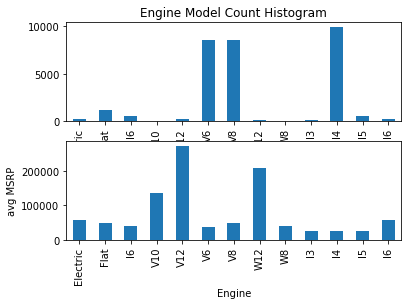

In [15]:
figr, axes = plt.subplots(2)
df.groupby('Engine')['MSRP'].count().plot(ax=axes[0],kind = 'bar', title = 'Engine Model Count Histogram')
pr_plt = df.groupby('Engine')['MSRP'].mean().plot(ax=axes[1],kind = 'bar')
pr_plt.set_ylabel("avg MSRP")

Majority of cars engine types are I4,V6,V8. From the above plots considering these 3 categories, it's evident that higher the number of cars of that engine model, lesser is the MSRP. We use mean MSRP to pick from these three predominant categories and fill in missing values.

In [16]:
data_mean = df.groupby('Engine', as_index=False)['MSRP'].mean()
print(data_mean)

      Engine           MSRP
0   Electric   57419.158824
1       Flat   47946.290216
2         I6   39234.907942
3        V10  137183.589744
4        V12  274703.135266
5         V6   36026.491733
6         V8   47534.572740
7        W12  209005.645161
8         W8   39202.500000
9         l3   24443.616071
10        l4   25783.174341
11        l5   26336.971698
12        l6   57120.788462


In [17]:
indexNames = df[df['Engine'].isnull()].index
data_mean_i4 = data_mean.iloc[10]['MSRP']
data_mean_v8 = data_mean.iloc[6]['MSRP']
count = 0
for idx in indexNames:
    if (df.iloc[idx]['MSRP'] <= data_mean_i4):
        df.at[idx,'Engine'] = 'l4'
    elif (df.iloc[idx]['MSRP'] >= data_mean_v8):
        df.at[idx,'Engine'] = 'V8'
    else :
        df.at[idx,'Engine'] = 'V6'

# Feature Drivetrain

In [18]:
df['Drivetrain'].unique()

array([nan, 'FWD', 'RWD', '4WD', 'AWD'], dtype=object)

Text(0, 0.5, 'avg MSRP')

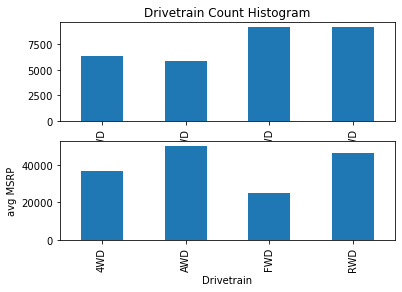

In [19]:
figr, axes = plt.subplots(2)
df.groupby('Drivetrain')['MSRP'].count().plot(ax=axes[0],kind = 'bar', title = 'Drivetrain Count Histogram')
pr_plt = df.groupby('Drivetrain')['MSRP'].mean().plot(ax=axes[1],kind = 'bar')
pr_plt.set_ylabel("avg MSRP")

From the above plots we observe that this feature cannot be predicted by MSRP alone. So we can try checking Drivetrain related other features. Our first option is feature Engine.

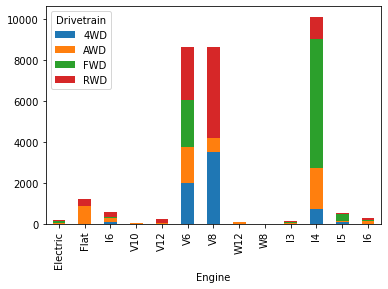

In [20]:
df.groupby(['Engine','Drivetrain']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

<AxesSubplot:title={'center':"Engine type of 'Feature Drivetrain' null values plot"}, xlabel='Engine'>

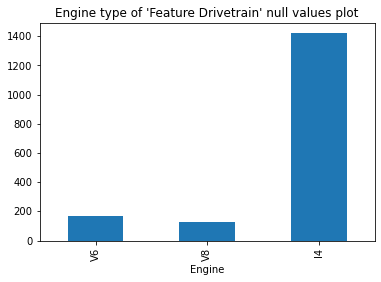

In [21]:
indexNames = df[df['Drivetrain'].isnull()].index
df[df['Drivetrain'].isnull()].groupby('Engine')['MSRP'].count().plot(kind='bar', title = 'Engine type of \'Feature Drivetrain\' null values plot')

Majority of Drivetrain null values are of engine type 'l4'. Relative MSRP among the above three listed engine categories is least for I4. Hence map I4 Drivetrain to 'FWD' which ranks lowest in MSRP also major portion of 'l4' cars.
MSRP of V8 ranks the highest, so we can map 'RWD' based on plot above. 
In case of V6 engine, Drivetrain are of all varieties so we can predict using by ascending avg MSRP. 

In [23]:
indexNames = df[df['Drivetrain'].isnull()].index
data_mean = df.groupby('Drivetrain', as_index=False)['MSRP'].mean().sort_values('MSRP')

data_mean_4wd = data_mean.iloc[0]['MSRP']
data_mean_awd = data_mean.iloc[1]['MSRP']
data_mean_fwd = data_mean.iloc[2]['MSRP']
data_mean_rwd = data_mean.iloc[3]['MSRP']

for idx in indexNames:
    if (df.iloc[idx]['Engine'] == 'l4'):
        df.at[idx,'Drivetrain'] = 'FWD'
    elif (df.iloc[idx]['Engine'] == 'V8'):
        df.at[idx,'Drivetrain'] = 'RWD'
    else:
        if (df.iloc[idx]['MSRP'] <= data_mean_fwd):
            df.at[idx,'Drivetrain'] = 'FWD'
        elif (df.iloc[idx]['MSRP'] <= data_mean_4wd):
            df.at[idx,'Drivetrain'] = '4WD'
        elif (df.iloc[idx]['MSRP'] <= data_mean_rwd):
            df.at[idx,'Drivetrain'] = 'RWD'
        else :
            df.at[idx,'Drivetrain'] = 'AWD'


# Feature Passenger Capacity

In [24]:
df['Passenger Capacity'].unique()

array([ 0,  5,  3,  2,  4,  6,  7,  8, 12,  9, 15,  1], dtype=int64)

Text(0, 0.5, 'avg MSRP')

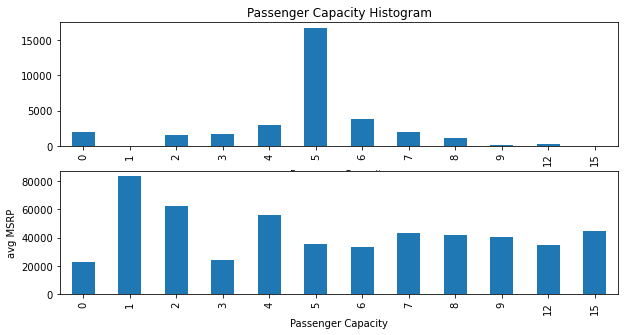

In [25]:
figr, axes = plt.subplots(2)
df.groupby('Passenger Capacity')['MSRP'].count().plot(ax=axes[0],kind = 'bar', title = 'Passenger Capacity Histogram')
pr_plt = df.groupby('Passenger Capacity')['MSRP'].mean().plot(ax=axes[1],kind = 'bar')
pr_plt.set_ylabel("avg MSRP")

# Feature Passenger Doors

In [26]:
df['Passenger Doors'].unique()

array([0, 2, 4, 3], dtype=int64)

In [27]:
df.groupby('Passenger Doors')['MSRP'].describe()

,count,mean,std,min,25%,50%,75%,max
Passenger Doors,,,,,,,,
0,1716.0,21923.659674,15422.259413,6929.0,13877.25,17314.5,22120.75,133300.0
2,8112.0,41801.412599,47351.544691,8455.0,22099.50,28710.0,38650.00,548800.0
3,690.0,33511.546377,7490.603394,17300.0,28940.00,32662.5,37166.25,61490.0
4,21744.0,37558.914183,25949.726291,8895.0,24520.00,32380.0,42000.00,492425.0


In [28]:
df.groupby('Passenger Doors')['Passenger Capacity'].describe()

,count,mean,std,min,25%,50%,75%,max
Passenger Doors,,,,,,,,
0,1716.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,8112.0,3.940335,1.325058,0.0,3.0,4.0,5.0,6.0
3,690.0,6.498551,4.501008,2.0,2.0,5.0,12.0,15.0
4,21744.0,5.390682,1.055297,0.0,5.0,5.0,6.0,9.0


# Feature: Category 

In [29]:
df['Category'].unique()

array([nan, 'Car', 'Pickup', 'SUV', 'Van'], dtype=object)

Text(0, 0.5, 'avg MSRP')

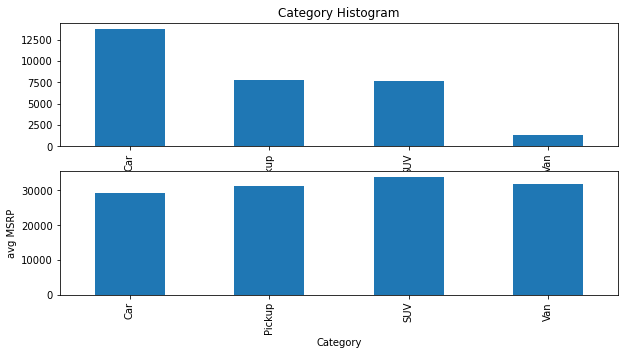

In [30]:
figr, axes = plt.subplots(2)
df.groupby('Category')['MSRP'].count().plot(ax=axes[0],kind = 'bar', title = 'Category Histogram')
pr_plt = df.groupby('Category')['MSRP'].median().plot(ax=axes[1],kind = 'bar')
pr_plt.set_ylabel("avg MSRP")

In [31]:
df.groupby('Category')['MSRP'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Car,13788.0,43092.690020,45488.793285,8455.0,21358.75,29195.0,46200.00,548800.0
Pickup,7750.0,31669.188516,9136.625064,10575.0,25185.00,31217.5,37200.00,80220.0
SUV,7706.0,38496.033221,19928.455167,13470.0,26333.50,33862.5,43598.75,325000.0
Van,1302.0,32756.069892,6818.042943,18995.0,28002.50,31865.0,36718.75,61490.0


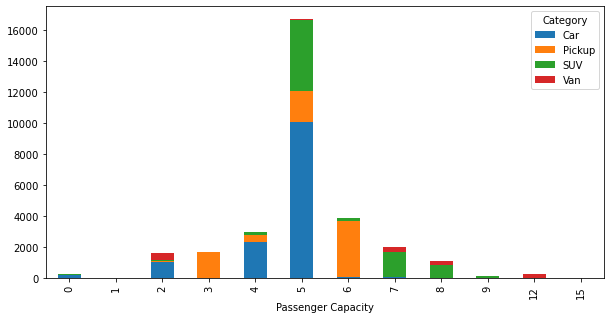

In [32]:
df.groupby(['Passenger Capacity','Category']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

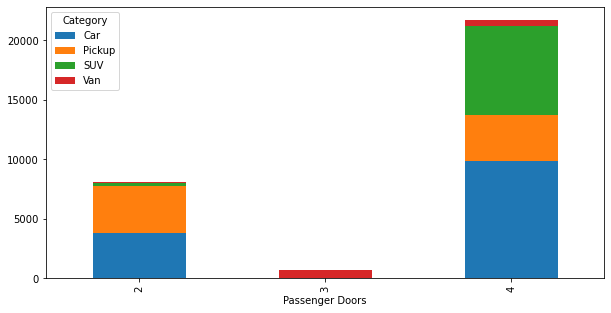

In [33]:
df.groupby(['Passenger Doors','Category']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

Text(0, 0.5, 'Passenger Capacity')

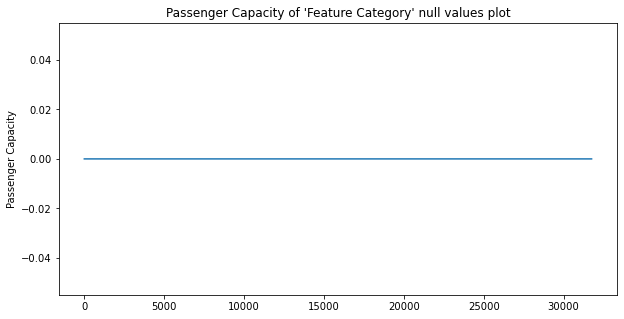

In [34]:
cap_plt = df[df['Category'].isnull()]['Passenger Capacity'].plot(kind='line', title = 'Passenger Capacity of \'Feature Category\' null values plot')
cap_plt.set_ylabel("Passenger Capacity")

In [35]:
indexNames = df[df['Category'].isnull()].index
for idx in indexNames:
    df.at[idx,'Category'] = 'Car'

# Feature: Wheelbase (in)

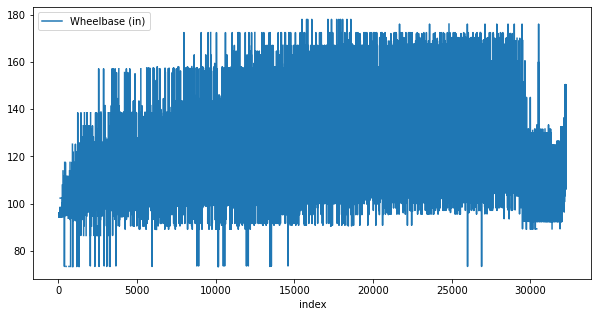

In [36]:
ax = plt.gca()

df.reset_index().plot(kind='line',x='index',y='Wheelbase (in)',ax=ax)
#df.reset_index().plot(kind='line',x='Wheelbase (in)',y='MSRP', color='red', ax=ax)

plt.show()

In [37]:
df['Wheelbase (in)'].describe()

count    30247.000000
mean       117.859369
std         18.074680
min         73.500000
25%        105.100000
50%        111.500000
75%        126.000000
max        178.000000
Name: Wheelbase (in), dtype: float64

Text(0, 0.5, 'avg MSRP')

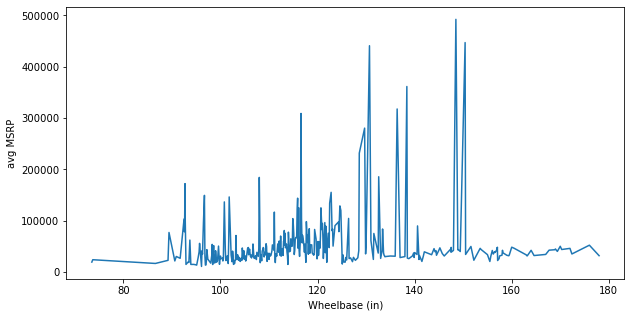

In [38]:
pr_plt = df.groupby('Wheelbase (in)')['MSRP'].mean().plot(kind = 'line')
pr_plt.set_ylabel("avg MSRP")

Text(0, 0.5, 'count of cars')

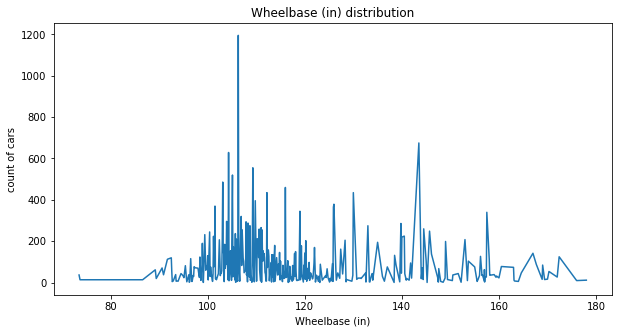

In [39]:
df.groupby('Wheelbase (in)')['MSRP'].count().plot(kind = 'line', title = 'Wheelbase (in) distribution').set_ylabel("count of cars")

Majority of the cars wheelbase lies in range of 100-120 inches and MSRP is randomly distributed in this range. We need to consider other feature to predict missing values.

Text(0, 0.5, 'Avg Wheelbase(in)')

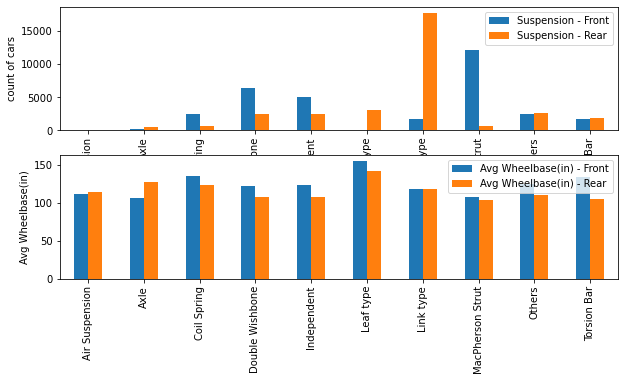

In [40]:
figr, axes = plt.subplots(2)
df1 = df.groupby('Suspension Type - Front')['MSRP'].count().to_frame()
df1.columns = ['Suspension - Front']
df2 = df.groupby('Suspension Type - Rear')['MSRP'].count().to_frame()
df2.columns = ['Suspension - Rear']
df_s = pd.concat([df1, df2], axis=1)
dfs = df_s.plot(ax=axes[0],kind='bar')
dfs.set_ylabel("count of cars")
df3 = df.groupby('Suspension Type - Front')['Wheelbase (in)'].mean().to_frame()
df4 = df.groupby('Suspension Type - Rear')['Wheelbase (in)'].mean().to_frame()
df3.columns = ['Avg Wheelbase(in) - Front']
df4.columns = ['Avg Wheelbase(in) - Rear']
df_s1 = pd.concat([df3, df4], axis=1)
dfs1 = df_s1.plot(ax=axes[1],kind='bar')
dfs1.set_ylabel("Avg Wheelbase(in)")

Text(0, 0.5, 'Count of cars with null value in Wheelbase')

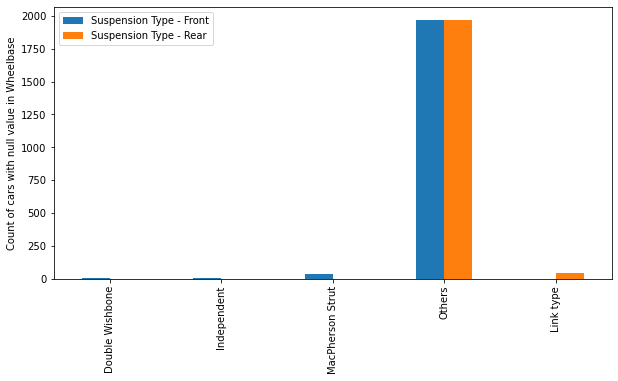

In [41]:
df1 = df[df['Wheelbase (in)'].isnull()].groupby('Suspension Type - Front')['MSRP'].count().to_frame()
df2 = df[df['Wheelbase (in)'].isnull()].groupby('Suspension Type - Rear')['MSRP'].count().to_frame()
df1.columns = ['Suspension Type - Front']
df2.columns = ['Suspension Type - Rear']
df_s = pd.concat([df1, df2], axis=1)
dfs = df_s.plot(kind='bar')
dfs.set_ylabel("Count of cars with null value in Wheelbase")

Most of the data set entries with null Wheelbase are of suspension type Others(both front and rear). Now we can check how Wheelbase is varied under this sub category

In [42]:
df[df['Suspension Type - Front'] == 'Others']['Wheelbase (in)'].to_frame().describe()

,Wheelbase (in)
count,470.000000
mean,125.121277
std,24.913558
min,98.300000
25%,100.000000
50%,120.000000
75%,147.075000
max,176.000000


In [43]:
df[df['Suspension Type - Rear'] == 'Others']['Wheelbase (in)'].to_frame().describe()

,Wheelbase (in)
count,625.000000
mean,110.136640
std,16.056418
min,73.500000
25%,99.900000
50%,109.500000
75%,120.200000
max,170.300000


Now we have truncated the wheelbase range to 110 to 125 inches based on the suspension type and now we are using random number to fill in the missing values within this range as earlier we saw random distribution between MSRP and Wheelbase.

In [44]:
indexNames = df[df['Wheelbase (in)'].isnull()].index
random_float_array = np.random.uniform(110.1, 125.1, len(indexNames))
count=0
for idx in indexNames:
    df.at[idx,'Wheelbase (in)'] = random_float_array[count]*10//1/10
    count+=1

# Feature SAE Net Torque @ RPM

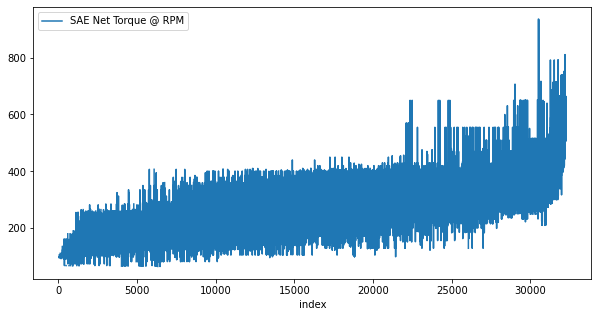

In [45]:
ax = plt.gca()

df.reset_index().plot(kind='line',x='index',y='SAE Net Torque @ RPM',ax=ax)
#df.reset_index().plot(kind='line',x='Wheelbase (in)',y='MSRP', color='red', ax=ax)

plt.show()

Text(0, 0.5, 'avg MSRP')

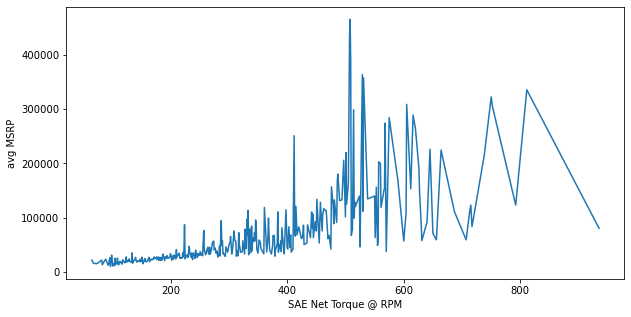

In [46]:
pr_plt = df.groupby('SAE Net Torque @ RPM')['MSRP'].mean().plot(kind = 'line')
pr_plt.set_ylabel("avg MSRP")

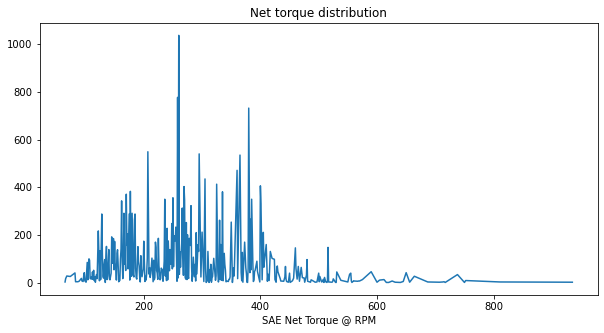

In [47]:
df.groupby('SAE Net Torque @ RPM')['MSRP'].count().plot(kind = 'line', title = 'Net torque distribution')

From the above two plots, we observe that most of the cars Net Torque is within 400 RPM and over that range with increase in Torque MSRP also increases. Missing values of Torque can be interpolated linearly.  

In [48]:
sae_ref = df.groupby('SAE Net Torque @ RPM')['MSRP'].count().to_frame().idxmax(axis = 0)
torque_ref = df.groupby('SAE Net Torque @ RPM')['MSRP'].mean().to_frame().iloc[sae_ref]
sae_ref = torque_ref.first_valid_index()
ref_val = torque_ref.loc[sae_ref]['MSRP']
indexNames = df[df['SAE Net Torque @ RPM'].isnull()].index
for idx in indexNames:
    df.at[idx,'SAE Net Torque @ RPM'] = df.at[idx,'MSRP'] * sae_ref / ref_val

# Feature: Fuel System

In [49]:
df['Fuel System'].unique()

array([nan, 'Electric FI', 'DI', 'SFI'], dtype=object)

Text(0, 0.5, 'avg MSRP')

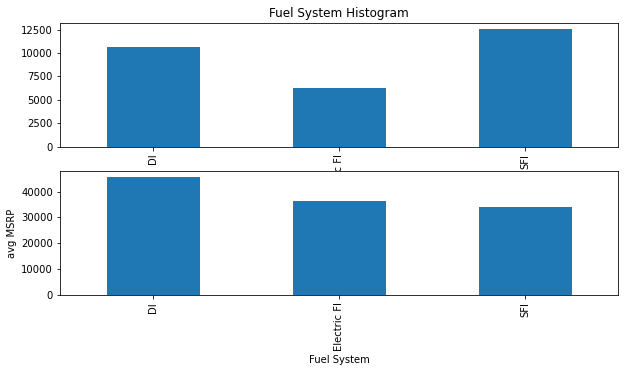

In [50]:
figr, axes = plt.subplots(2)
df.groupby('Fuel System')['MSRP'].count().plot(ax=axes[0],kind = 'bar', title = 'Fuel System Histogram')
pr_plt = df.groupby('Fuel System')['MSRP'].mean().plot(ax=axes[1],kind = 'bar')
pr_plt.set_ylabel("avg MSRP")

In [51]:
df.groupby('Fuel System')['MSRP'].describe()

,count,mean,std,min,25%,50%,75%,max
Fuel System,,,,,,,,
DI,10600.0,45517.218868,39398.954351,8895.0,26050.0,35572.5,49900.0,492425.0
Electric FI,6275.0,36499.316016,26030.939780,8599.0,23897.5,31000.0,39655.0,441600.0
SFI,12561.0,34030.131120,29075.665240,8999.0,22765.0,29220.0,37050.0,548800.0


We cannot completely predict Fuel System solely relying on MSRP, we need to look for other features for a better categorization.

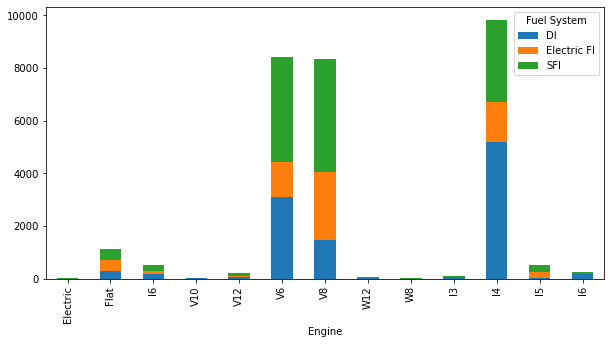

In [52]:
df.groupby(['Engine','Fuel System']).size().unstack().plot(kind='bar',stacked=True)

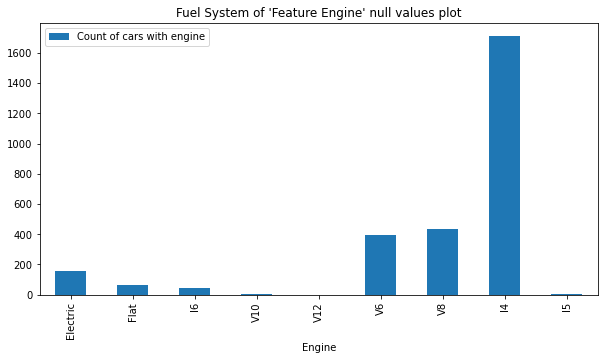

In [53]:
df1 = df[df['Fuel System'].isnull()].groupby('Engine')['MSRP'].count().to_frame()
df1.columns = ['Count of cars with engine']
df1.plot(kind='bar', title = 'Fuel System of \'Feature Engine\' null values plot')

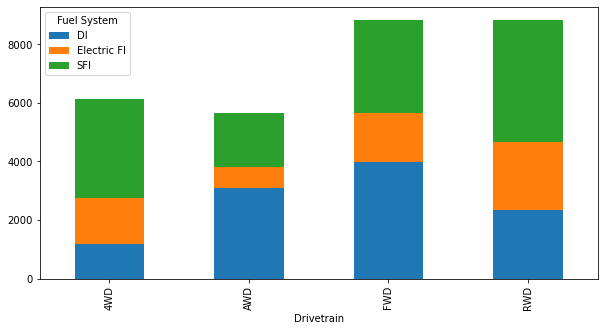

In [54]:
df.groupby(['Drivetrain','Fuel System']).size().unstack().plot(kind='bar',stacked=True)

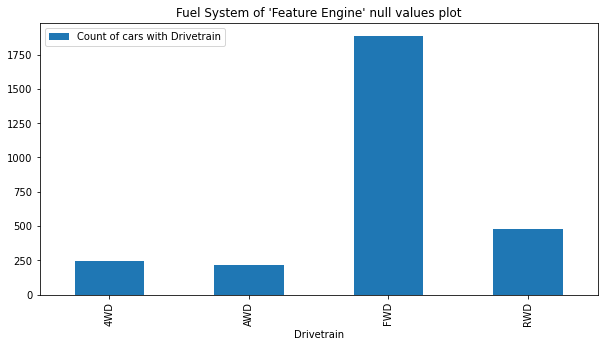

In [55]:
df1 = df[df['Fuel System'].isnull()].groupby('Drivetrain')['MSRP'].count().to_frame()
df1.columns = ['Count of cars with Drivetrain']
df1.plot(kind='bar', title = 'Fuel System of \'Feature Engine\' null values plot')

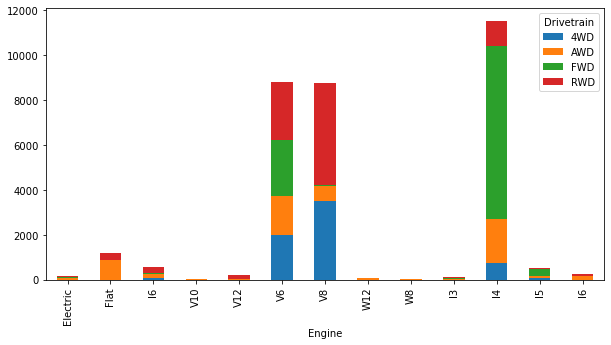

In [56]:
df1 = df[df['Fuel System'].isnull()]
df.groupby(['Engine','Drivetrain']).size().unstack().plot(kind='bar',stacked=True)

On analysing the above graphs and consolidating the outputs, engine of type 'Electric' most likely has fuel system as 'Electric FI', we can bucketize the remaining cars based on MSRP mean into either 'DI' or 'SFI'

In [57]:
indexNames = df[df['Fuel System'].isnull()].index
data_mean = df.groupby('Fuel System', as_index=False)['MSRP'].mean()
data_mean_DI = data_mean.iloc[0]['MSRP']
for idx in indexNames:
    if (df.iloc[idx]['Engine'] == "Electric"):
        df.at[idx,'Fuel System'] = 'Electric FI'
    elif (df.iloc[idx]['MSRP'] >= data_mean_DI):
        df.at[idx,'Fuel System'] = 'DI'
    else :
        df.at[idx,'Fuel System'] = 'SFI'


# Feature: SAE Net Horsepower @ RPM

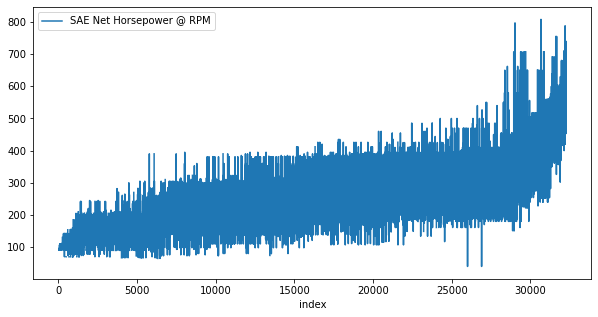

In [58]:
ax = plt.gca()

df.reset_index().plot(kind='line',x='index',y='SAE Net Horsepower @ RPM',ax=ax)

plt.show()

Text(0, 0.5, 'avg MSRP')

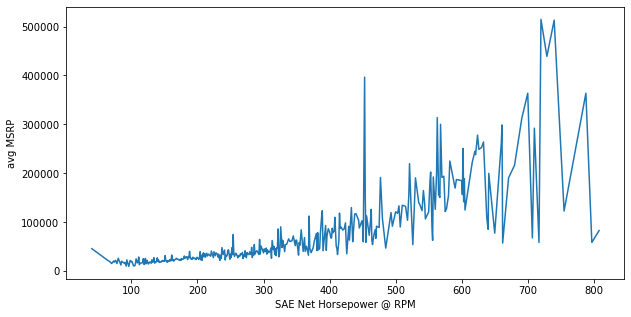

In [59]:
pr_plt = df.groupby('SAE Net Horsepower @ RPM')['MSRP'].mean().plot(kind = 'line')
pr_plt.set_ylabel("avg MSRP")

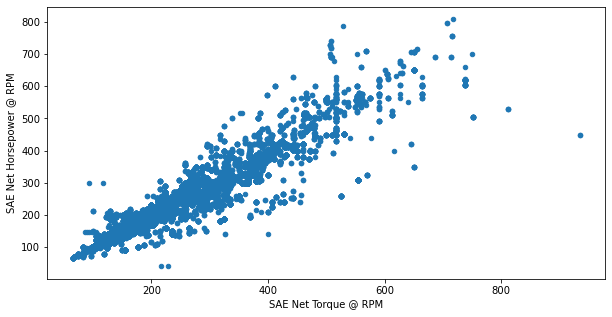

In [60]:
df.plot(kind='scatter',x='SAE Net Torque @ RPM',y='SAE Net Horsepower @ RPM')

In [61]:
sae_ref = df.groupby('SAE Net Horsepower @ RPM')['MSRP'].count().to_frame().idxmax(axis = 0)
torque_ref = df.groupby('SAE Net Horsepower @ RPM')['MSRP'].mean().to_frame().iloc[sae_ref]
sae_ref = torque_ref.first_valid_index()
ref_val = torque_ref.loc[sae_ref]['MSRP']
indexNames = df[df['SAE Net Horsepower @ RPM'].isnull()].index
for idx in indexNames:
    df.at[idx,'SAE Net Horsepower @ RPM'] = df.at[idx,'MSRP'] * sae_ref / ref_val

We can consolidate two features - 'SAE Net Horsepower @ RPM' & 'SAE Net Torque @ RPM' through linear combination based on above plots analysis, into one feature - 'SAE Net @RPM'

In [62]:
df['SAE Net @RPM'] = df['SAE Net Horsepower @ RPM']+df['SAE Net Torque @ RPM']

In [63]:
df = df.drop(['SAE Net Horsepower @ RPM','SAE Net Torque @ RPM'],axis=1)

# Feature: Displacement

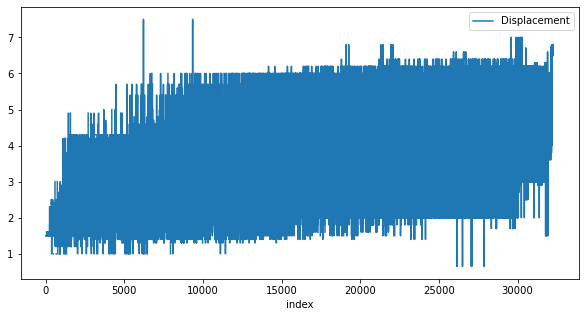

In [64]:
ax = plt.gca()

df.reset_index().plot(kind='line',x='index',y='Displacement',ax=ax)

plt.show()

Text(0, 0.5, 'avg MSRP')

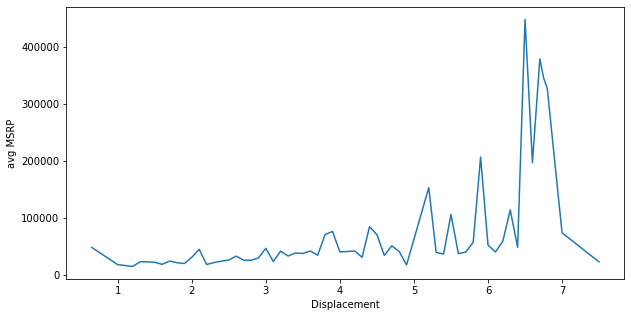

In [65]:
pr_plt = df.groupby('Displacement')['MSRP'].mean().plot(kind = 'line')
pr_plt.set_ylabel("avg MSRP")

Text(0, 0.5, 'count of cars')

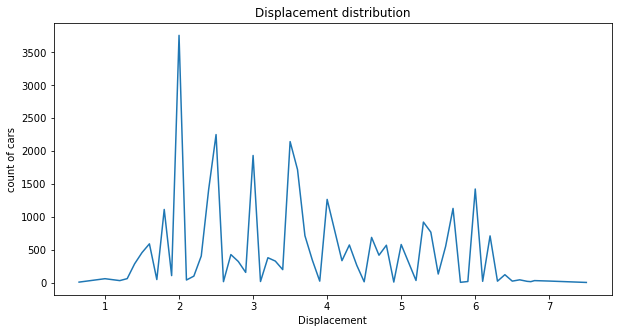

In [66]:
df.groupby('Displacement')['MSRP'].count().plot(kind = 'line', title = 'Displacement distribution').set_ylabel("count of cars")

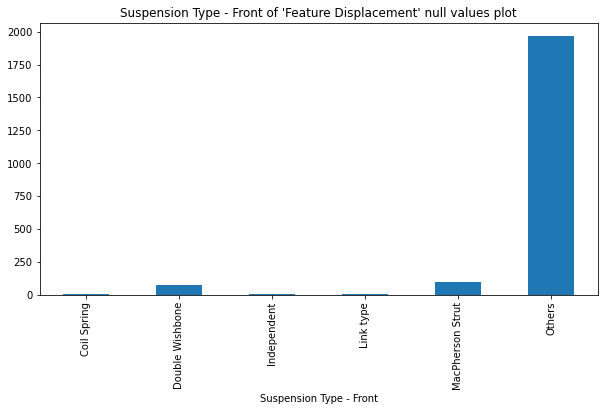

In [67]:
df[df['Displacement'].isnull()].groupby('Suspension Type - Front')['MSRP'].count().plot(kind='bar', title = 'Suspension Type - Front of \'Feature Displacement\' null values plot')

Text(0, 0.5, 'Avg Displacement')

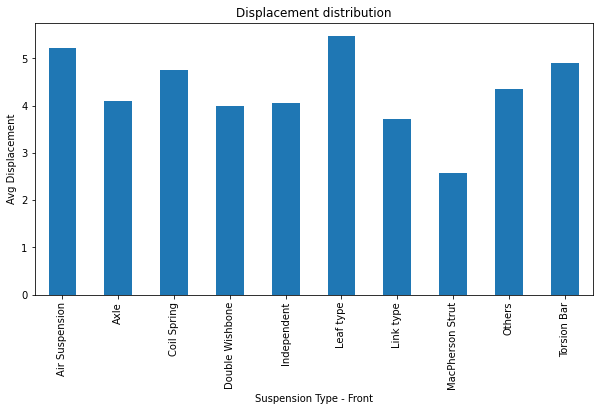

In [68]:
df.groupby('Suspension Type - Front')['Displacement'].mean().plot(kind = 'bar', title = 'Displacement distribution').set_ylabel("Avg Displacement")

In [69]:
df[df['Suspension Type - Front'] == 'Others']['Displacement'].describe()

count    471.000000
mean       4.343737
std        1.678230
min        2.000000
25%        2.500000
50%        4.000000
75%        6.200000
max        6.750000
Name: Displacement, dtype: float64

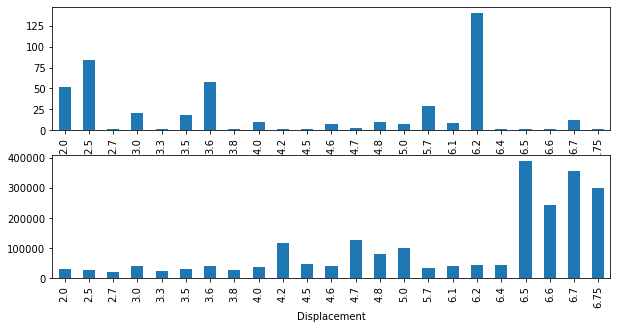

In [70]:
figr, axes = plt.subplots(2)
df[df['Suspension Type - Front'] == 'Others'].groupby('Displacement')['MSRP'].count().plot(ax=axes[0],kind = 'bar')
df[df['Suspension Type - Front'] == 'Others'].groupby('Displacement')['MSRP'].mean().plot(ax=axes[1],kind = 'bar')

In [71]:
df[df['Suspension Type - Front'] == 'Others'].groupby('Displacement')['MSRP'].mean()

Displacement
2.00     29870.480769
2.50     26394.702381
2.70     22225.000000
3.00     40811.000000
3.30     23690.000000
3.50     30493.777778
3.60     39901.379310
3.80     27775.000000
4.00     37095.000000
4.20    118900.000000
4.50     48700.000000
4.60     41392.857143
4.70    126666.666667
4.80     79480.000000
5.00    102357.142857
5.70     33001.724138
6.10     40328.750000
6.20     42968.865248
6.40     43775.000000
6.50    389995.000000
6.60    245000.000000
6.70    356544.583333
6.75    298990.000000
Name: MSRP, dtype: float64

From the above graphs it's evident that majority of missing values are of suspension type 'Others'. In this type, we have four prominent values for displacement - 2.0,2.5,3.6,6.2. Based on avg MSRP we can predict Displacement from this list.

In [72]:
indexNames = df[df['Displacement'].isnull()].index
data_mean = df[df['Suspension Type - Front'] == 'Others'].groupby('Displacement', as_index=False)['MSRP'].mean()
data_mean_2_0 = data_mean.iloc[0]['MSRP']
data_mean_2_5 = data_mean.iloc[1]['MSRP']
data_mean_3_6 = data_mean.iloc[6]['MSRP']
data_mean_6_2 = data_mean.loc[17]['MSRP']

for idx in indexNames:
    if (df.iloc[idx]['MSRP'] >= data_mean_6_2):
        df.at[idx,'Displacement'] = 6.2
    elif (df.iloc[idx]['MSRP'] >= data_mean_3_6):
        df.at[idx,'Displacement'] = 3.6
    elif (df.iloc[idx]['MSRP'] >= data_mean_2_0):
        df.at[idx,'Displacement'] = 2.0
    else :
        df.at[idx,'Displacement'] = 2.5

# Feature: Trans Description Cont.

In [73]:
df['Trans Description Cont.'].unique()

array([nan, 'Manual', 'Automatic', 'CVT'], dtype=object)

Text(0, 0.5, 'avg MSRP')

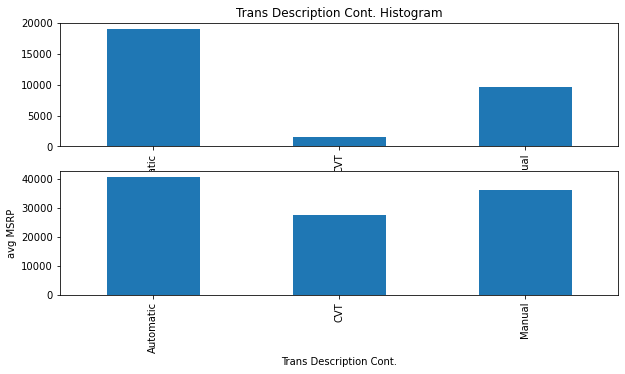

In [74]:
figr, axes = plt.subplots(2)
df.groupby('Trans Description Cont.')['MSRP'].count().plot(ax=axes[0],kind = 'bar', title = 'Trans Description Cont. Histogram')
pr_plt = df.groupby('Trans Description Cont.')['MSRP'].mean().plot(ax=axes[1],kind = 'bar')
pr_plt.set_ylabel("avg MSRP")

In [75]:
df.groupby('Trans Description Cont.')['MSRP'].describe()

,count,mean,std,min,25%,50%,75%,max
Trans Description Cont.,,,,,,,,
Automatic,19063.0,40685.810575,31603.075454,9770.0,26685.0,33930.0,43600.0,492425.0
CVT,1596.0,27668.856516,9910.434879,13120.0,22165.0,25677.5,31000.0,120440.0
Manual,9566.0,36219.604223,36022.991848,8599.0,20360.0,26995.0,36657.5,548800.0


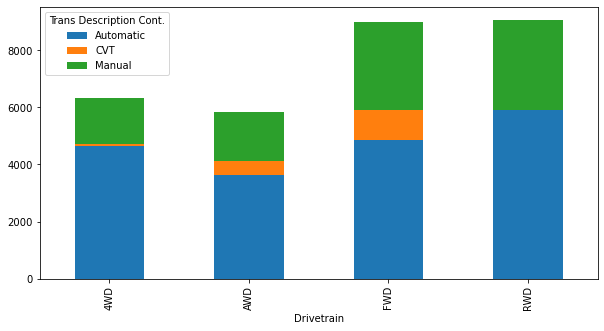

In [76]:
df.groupby(['Drivetrain','Trans Description Cont.']).size().unstack().plot(kind='bar',stacked=True)

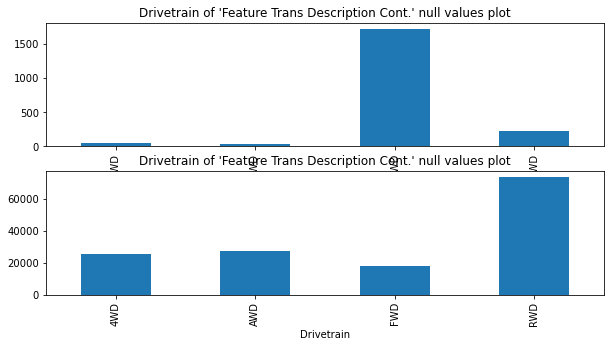

In [77]:
figr, axes = plt.subplots(2)
df[df['Trans Description Cont.'].isnull()].groupby('Drivetrain')['MSRP'].count().plot(ax=axes[0],kind='bar', title = 'Drivetrain of \'Feature Trans Description Cont.\' null values plot')
df[df['Trans Description Cont.'].isnull()].groupby('Drivetrain')['MSRP'].mean().plot(ax=axes[1],kind='bar', title = 'Drivetrain of \'Feature Trans Description Cont.\' null values plot')

From the statistical analysis, majority of the cars are of two categories, out of which two third of cars are of Automatic and remaining are manual. From the above stack graph, given a category, MSRP is randomly distributed across these categories.So, for predicting missing values we can fill them as 2:1 of predominant two categories.

In [78]:
cnt = int(df[df['Trans Description Cont.'].isnull()]['MSRP'].count())
cnt1 = int(cnt/3)
cnt2 = cnt-cnt1
arr1 = np.full(shape=cnt1,fill_value=1,dtype=np.int)
arr2 = np.full(shape=cnt2,fill_value=2,dtype=np.int)
arr = np.hstack((arr1, arr2))
np.random.shuffle(arr)

indexNames = df[df['Trans Description Cont.'].isnull()].index
count = 0
for idx in indexNames:
    if (arr[count]==1):
        df.at[idx,'Trans Description Cont.'] = 'Manual'
    else:
        df.at[idx,'Trans Description Cont.'] = 'Automatic'
    count+=1

# Feature: Trans Type

In [79]:
df['Trans Type'].unique()

array([nan, '5', '4', '<3', '6', 'CVT', '8', '9', '7', '10'], dtype=object)

Text(0, 0.5, 'avg MSRP')

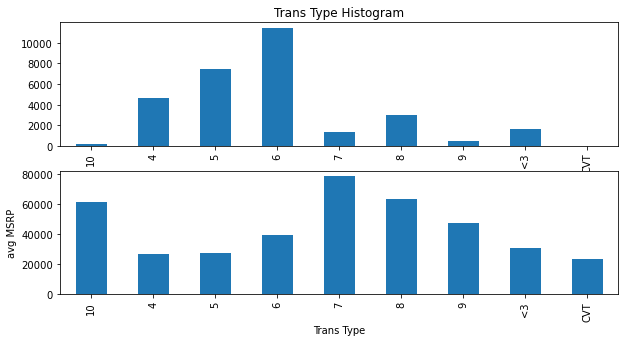

In [80]:
figr, axes = plt.subplots(2)
df.groupby('Trans Type')['MSRP'].count().plot(ax=axes[0],kind = 'bar', title = 'Trans Type Histogram')
pr_plt = df.groupby('Trans Type')['MSRP'].mean().plot(ax=axes[1],kind = 'bar')
pr_plt.set_ylabel("avg MSRP")

Most of the cars have either 4, 5 or 6 gears, MSRP is gradually increasing with increased number of gears and next considerable chunks are cars with 7 & 8 gears with the highest avg MSRP. The other category is <3 which needs other feature to be predicted

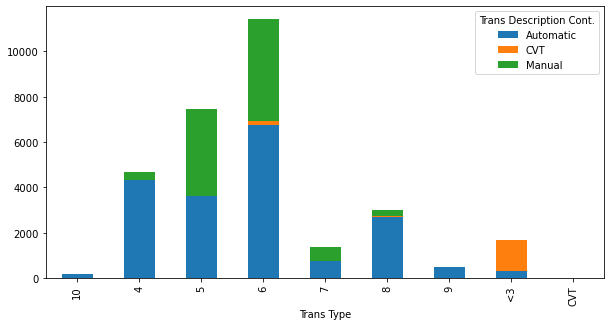

In [81]:
df.groupby(['Trans Type','Trans Description Cont.']).size().unstack().plot(kind='bar',stacked=True)

In [82]:
df.groupby('Trans Type', as_index=False)['MSRP'].mean()

,Trans Type,MSRP
0,10,61632.797927
1,4,27055.504611
2,5,27662.841802
3,6,39742.846410
4,7,78529.648472
5,8,63262.461667
6,9,47591.283368
7,<3,31021.114853
8,CVT,23182.272727


From the above plot, it's evident that most of the cars with <3 gears are of Trans Description 'CVT'

In [83]:
indexNames = df[df['Trans Type'].isnull()].index
data_mean = df.groupby('Trans Type', as_index=False)['MSRP'].mean()
data_mean_4 = data_mean.iloc[3]['MSRP']
data_mean_5 = data_mean.iloc[4]['MSRP']
data_mean_6 = data_mean.iloc[5]['MSRP']
data_mean_7 = data_mean.iloc[6]['MSRP']
data_mean_8 = data_mean.iloc[7]['MSRP']
for idx in indexNames:
    if (df.iloc[idx]['Trans Description Cont.'] == 'CVT'):
        df.at[idx,'Trans Type'] = '<3'
    else :
        if (df.iloc[idx]['MSRP'] >= data_mean_7):
            df.at[idx,'Trans Type'] = '7'
        elif (df.iloc[idx]['MSRP'] >= data_mean_8):
            df.at[idx,'Trans Type'] = '8'
        elif (df.iloc[idx]['MSRP'] >= data_mean_6):
            df.at[idx,'Trans Type'] = '6'
        elif (df.iloc[idx]['MSRP'] <= data_mean_4):
            df.at[idx,'Trans Type'] = '4'
        else :
            df.at[idx,'Trans Type'] = '5'

# Feature: Basic Miles/km

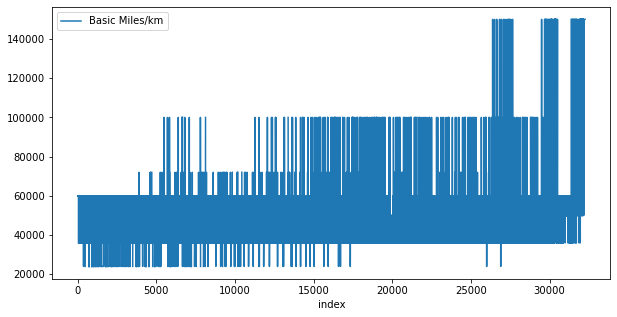

In [84]:
ax = plt.gca()
df.reset_index().plot(kind='line',x='index',y='Basic Miles/km',ax=ax)
plt.show()

In [85]:
df['Basic Miles/km'].unique()

array([    nan,  36000.,  60000.,  50000.,  24000.,  72000., 100000.,
        49711.,  42000., 150000.])

Text(0, 0.5, 'count of cars')

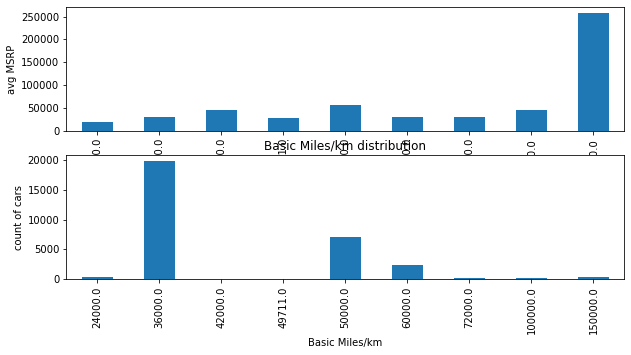

In [86]:
figr, axes = plt.subplots(2)
pr_plt = df.groupby('Basic Miles/km')['MSRP'].mean().plot(ax=axes[0],kind = 'bar')
pr_plt.set_ylabel("avg MSRP")
df.groupby('Basic Miles/km')['MSRP'].count().plot(ax=axes[1],kind = 'bar', title = 'Basic Miles/km distribution').set_ylabel("count of cars")

Most of the cars warranty Basic Miles/km is of three types 36000,50000 or 60000. Based on avg MSRP we can predict the missing values into these three sets

In [87]:
indexNames = df[df['Basic Miles/km'].isnull()].index
data_mean = df.groupby('Basic Miles/km', as_index=False)['MSRP'].mean()
data_mean_36 = data_mean.iloc[1]['Basic Miles/km']
data_mean_50 = data_mean.iloc[4]['Basic Miles/km']
data_mean_60 = data_mean.iloc[5]['Basic Miles/km']
count = 0
for idx in indexNames:
    if (df.iloc[idx]['MSRP'] >= data_mean_50):
        df.at[idx,'Basic Miles/km'] = 50000.0
    elif (df.iloc[idx]['MSRP'] >= data_mean_60):
        df.at[idx,'Basic Miles/km'] = 60000.0
    else :
        df.at[idx,'Basic Miles/km'] = 36000.0

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32262 entries, 0 to 32261
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MSRP                               32262 non-null  float64
 1   Engine                             32262 non-null  object 
 2   Drivetrain                         32262 non-null  object 
 3   Passenger Capacity                 32262 non-null  int64  
 4   Passenger Doors                    32262 non-null  int64  
 5   Wheelbase (in)                     32262 non-null  float64
 6   Fuel System                        32262 non-null  object 
 7   Displacement                       32262 non-null  float64
 8   Trans Description Cont.            32262 non-null  object 
 9   Trans Type                         32262 non-null  object 
 10  Suspension Type - Front            32262 non-null  object 
 11  Suspension Type - Rear             32262 non-null  obj

# Feature: Basic Years

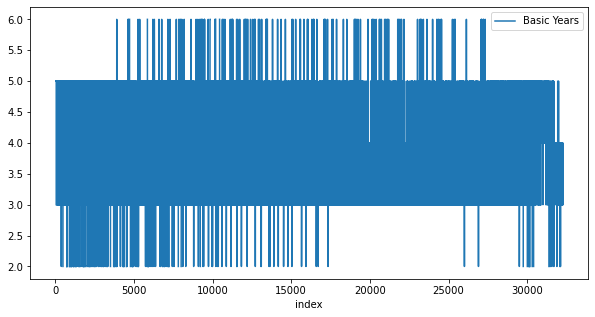

In [89]:
ax = plt.gca()
df.reset_index().plot(kind='line',x='index',y='Basic Years',ax=ax)
plt.show()

Text(0, 0.5, 'avg MSRP')

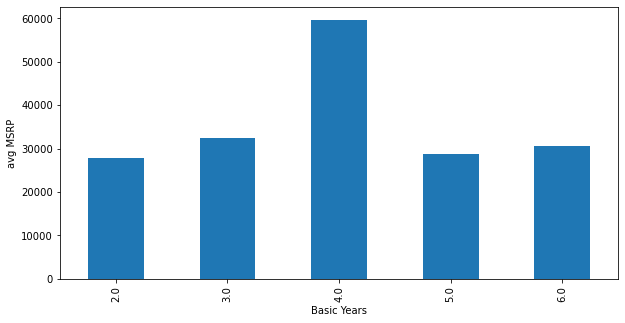

In [90]:
pr_plt = df.groupby('Basic Years')['MSRP'].mean().plot(kind = 'bar')
pr_plt.set_ylabel("avg MSRP")

Text(0, 0.5, 'count of cars')

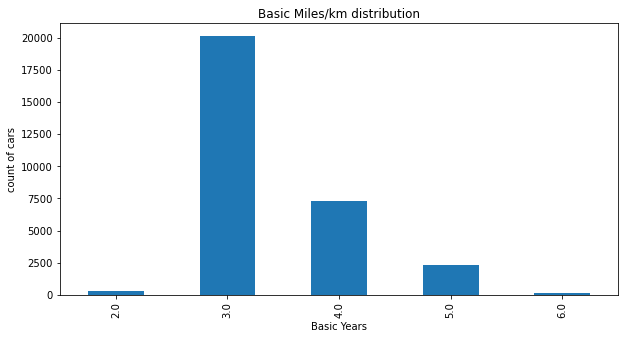

In [91]:
df.groupby('Basic Years')['MSRP'].count().plot(kind = 'bar', title = 'Basic Miles/km distribution').set_ylabel("count of cars")

Text(0, 0.5, 'avg basic miles/km')

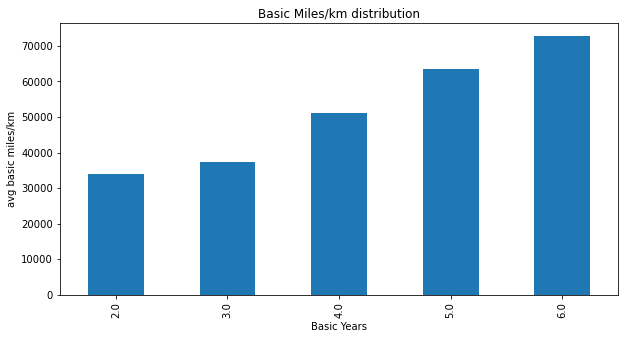

In [92]:
df.groupby('Basic Years')['Basic Miles/km'].mean().plot(kind = 'bar', title = 'Basic Miles/km distribution').set_ylabel("avg basic miles/km")

Out of Basic Years/km, majority are with 3, 4 or 5 yrs. Based on avg MSRP we can assign 4 yrs due to evident peak. For alloting either 3 or 5 to missing values we can use avg Basic Miles.km 

In [93]:
indexNames = df[df['Basic Years'].isnull()].index
data_mean = df.groupby('Basic Years', as_index=False)['MSRP'].mean()
data_mean_4 = data_mean.iloc[2]['MSRP']
data_mean = df.groupby('Basic Years', as_index=False)['Basic Miles/km'].mean()
data_mean_5 = data_mean.iloc[3]['Basic Miles/km']

for idx in indexNames:
    if (df.iloc[idx]['MSRP'] >= data_mean_4):
        df.at[idx,'Basic Years'] = 4.0
    else :
        if (df.iloc[idx]['Basic Miles/km'] >= data_mean_5):
            df.at[idx,'Basic Years'] = 5.0
        else :
            df.at[idx,'Basic Years'] = 3.0

# Feature: Corrosion Miles/km

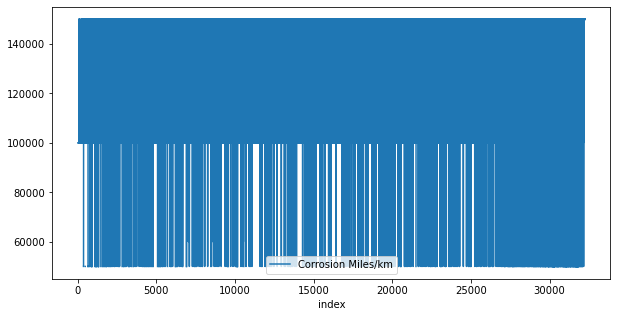

In [94]:
ax = plt.gca()
df.reset_index().plot(kind='line',x='index',y='Corrosion Miles/km',ax=ax)
plt.show()

Text(0, 0.5, 'avg MSRP')

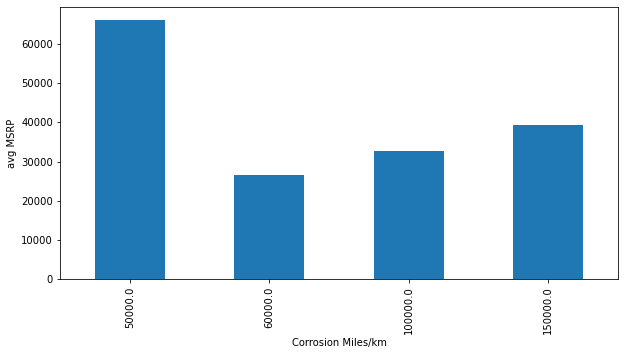

In [95]:
pr_plt = df.groupby('Corrosion Miles/km')['MSRP'].mean().plot(kind = 'bar')
pr_plt.set_ylabel("avg MSRP")

Text(0, 0.5, 'count of cars')

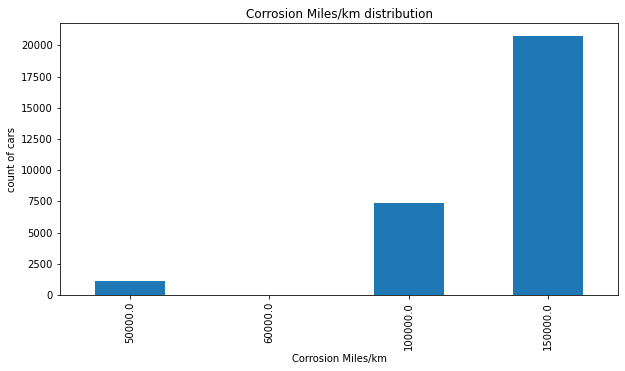

In [96]:
df.groupby('Corrosion Miles/km')['MSRP'].count().plot(kind = 'bar', title = 'Corrosion Miles/km distribution').set_ylabel("count of cars")

In [97]:
indexNames = df[df['Corrosion Miles/km'].isnull()].index
data_mean = df.groupby('Corrosion Miles/km', as_index=False)['MSRP'].mean()
data_mean_5 = data_mean.iloc[0]['MSRP']
data_mean_6 = data_mean.iloc[1]['MSRP']
data_mean_10 = data_mean.iloc[2]['MSRP']
data_mean_15 = data_mean.iloc[3]['MSRP']
count = 0
for idx in indexNames:
    if (df.iloc[idx]['MSRP'] >= data_mean_5):
        df.at[idx,'Corrosion Miles/km'] = 50000.0
    elif (df.iloc[idx]['MSRP'] <= data_mean_6):
        df.at[idx,'Corrosion Miles/km'] = 60000.0
    elif (df.iloc[idx]['MSRP'] <= data_mean_10):
        df.at[idx,'Corrosion Miles/km'] = 100000.0
    else :
        df.at[idx,'Corrosion Miles/km'] = 150000.0


# Feature: Corrosion Years

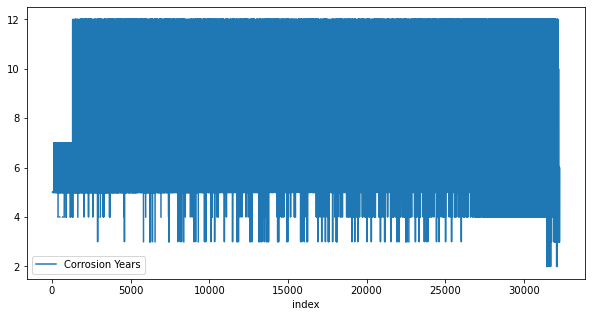

In [98]:
ax = plt.gca()
df.reset_index().plot(kind='line',x='index',y='Corrosion Years',ax=ax)
plt.show()

Text(0, 0.5, 'avg MSRP')

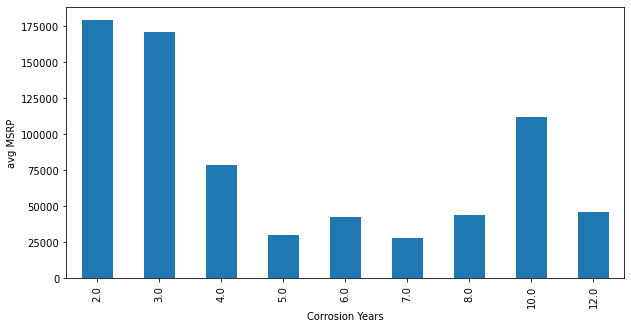

In [99]:
pr_plt = df.groupby('Corrosion Years')['MSRP'].mean().plot(kind = 'bar')
pr_plt.set_ylabel("avg MSRP")

Text(0, 0.5, 'count of cars')

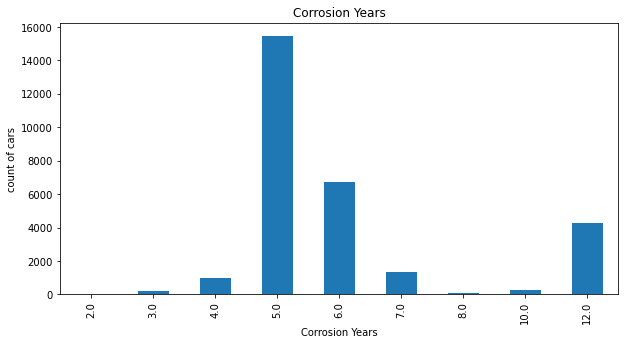

In [100]:
df.groupby('Corrosion Years')['MSRP'].count().plot(kind = 'bar', title = 'Corrosion Years').set_ylabel("count of cars")

Text(0, 0.5, 'avg Corrosion miles/km')

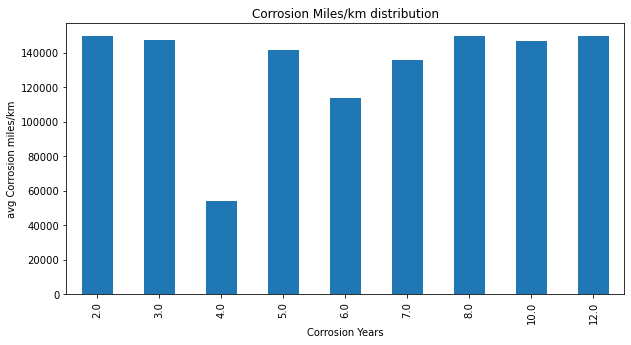

In [101]:
df.groupby('Corrosion Years')['Corrosion Miles/km'].mean().plot(kind = 'bar', title = 'Corrosion Miles/km distribution').set_ylabel("avg Corrosion miles/km")

Text(0, 0.5, 'avg basic years')

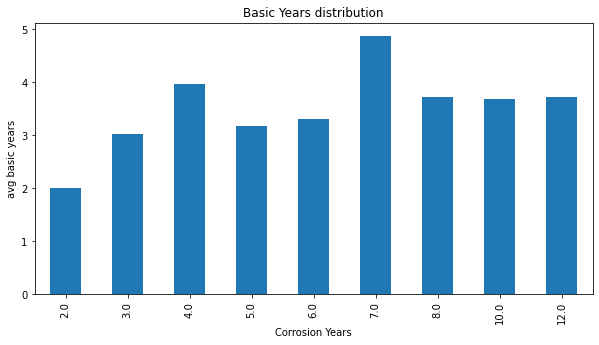

In [102]:
df.groupby('Corrosion Years')['Basic Years'].mean().plot(kind = 'bar', title = 'Basic Years distribution').set_ylabel("avg basic years")

Majority of cars offer Warranty against corrosion for 5 yrs, we are using MSRP and Corrosion miles/km to predict missing values of Corrosion yrs along with Basic years which can help us to judge between 5 or 7 corrosion years.

In [103]:
indexNames = df[df['Corrosion Years'].isnull()].index
data_mean = df.groupby('Corrosion Years', as_index=False)['MSRP'].mean()
data_mean_6 = data_mean.iloc[4]['MSRP']
data_mean = df.groupby('Corrosion Years', as_index=False)['Basic Years'].mean()
data_mean_7 = data_mean.iloc[5]['Basic Years']
data_mean = df.groupby('Corrosion Years', as_index=False)['Corrosion Miles/km'].mean()
data_mean_4 = data_mean.iloc[2]['Corrosion Miles/km']
data_mean_12 = data_mean.iloc[8]['Corrosion Miles/km']

for idx in indexNames:
        if (df.iloc[idx]['Corrosion Miles/km'] <= data_mean_4):
            df.at[idx,'Corrosion Years'] = 4.0
        elif (df.iloc[idx]['Corrosion Miles/km'] <= data_mean_12) :
            df.at[idx,'Corrosion Years'] = 12.0
        else :
            if (df.iloc[idx]['MSRP'] <= data_mean_6):
                df.at[idx,'Corrosion Years'] = 6.0
            if (df.iloc[idx]['Basic Years'] >= data_mean_7):
                df.at[idx,'Corrosion Years'] = 7.0
            else :
                df.at[idx,'Corrosion Years'] = 5.0
            

# Feature: Drivetrain Miles/km

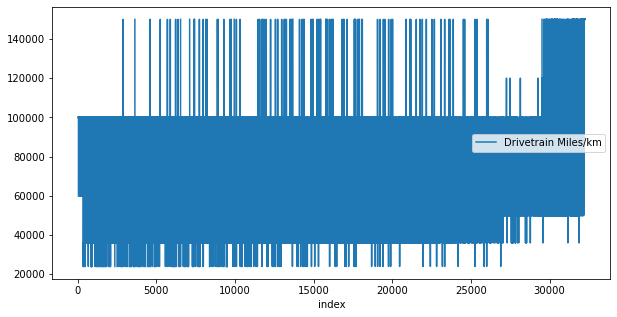

In [104]:
ax = plt.gca()
df.reset_index().plot(kind='line',x='index',y='Drivetrain Miles/km',ax=ax)
plt.show()

Text(0, 0.5, 'avg MSRP')

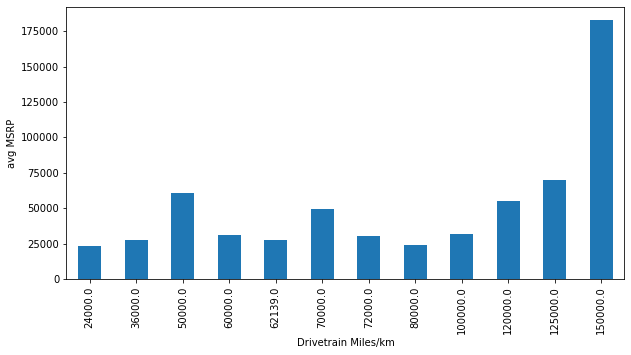

In [105]:
pr_plt = df.groupby('Drivetrain Miles/km')['MSRP'].mean().plot(kind = 'bar')
pr_plt.set_ylabel("avg MSRP")

Text(0, 0.5, 'count of cars')

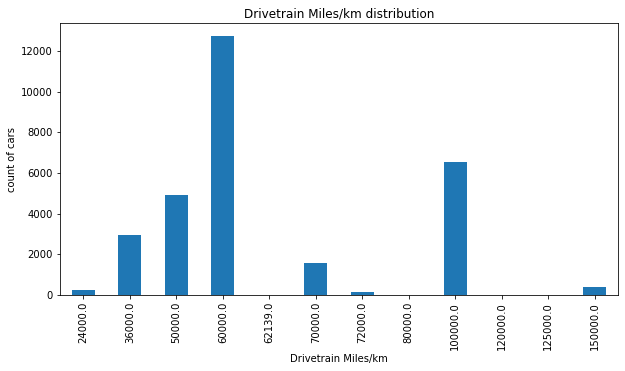

In [106]:
df.groupby('Drivetrain Miles/km')['MSRP'].count().plot(kind = 'bar', title = 'Drivetrain Miles/km distribution').set_ylabel("count of cars")

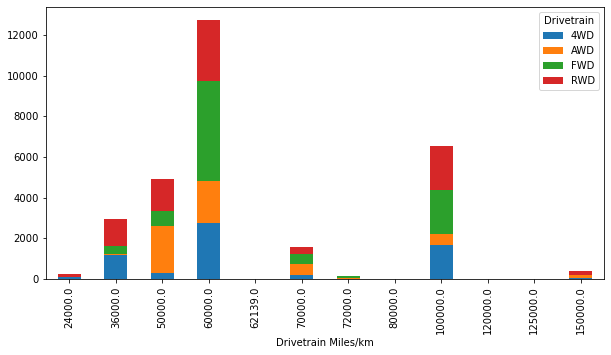

In [107]:
df.groupby(['Drivetrain Miles/km','Drivetrain']).size().unstack().plot(kind='bar',stacked=True)

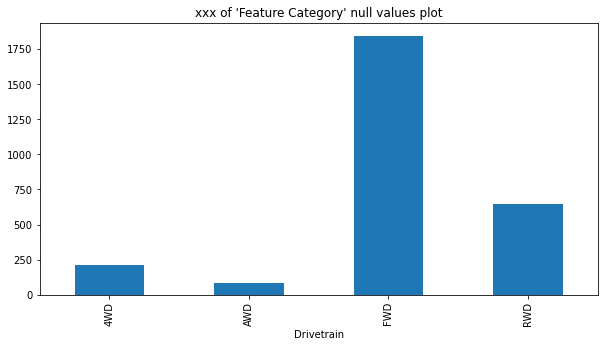

In [108]:
df[df['Drivetrain Miles/km'].isnull()].groupby('Drivetrain')['MSRP'].count().plot(kind='bar', title = 'xxx of \'Feature Category\' null values plot')

In [109]:
df.groupby('Drivetrain Miles/km')['MSRP'].count()

Drivetrain Miles/km
24000.0       227
36000.0      2928
50000.0      4916
60000.0     12739
62139.0         6
70000.0      1584
72000.0       137
80000.0        10
100000.0     6519
120000.0        5
125000.0        1
150000.0      402
Name: MSRP, dtype: int64

Consolidating information from the above plots, it's evident that warranty offered on drive train miles/km is 36000 to 12000 (top 5 in this range constitute most). In descending order of MSRP 50k,70k,60k ~ 100k, least 36k. So for almost similar MSRP we will randomly distribute based on count of cars.

In [110]:
indexNames = df[df['Drivetrain Miles/km'].isnull()].index
data_mean = df.groupby('Drivetrain Miles/km', as_index=False)['MSRP'].mean()
data_mean_50 = data_mean.iloc[2]['MSRP']
data_mean_70 = data_mean.iloc[5]['MSRP']
data_mean_36 = data_mean.iloc[1]['MSRP']

for idx in indexNames:
        if (df.iloc[idx]['MSRP'] >= data_mean_50):
            df.at[idx,'Drivetrain Miles/km'] = 50000.0
        elif (df.iloc[idx]['MSRP'] >= data_mean_70) :
            df.at[idx,'Drivetrain Miles/km'] = 70000.0
        elif (df.iloc[idx]['MSRP'] <= data_mean_36):
            df.at[idx,'Drivetrain Miles/km'] = 36000.0

cnt = int(df[df['Drivetrain Miles/km'].isnull()]['MSRP'].count())
cnt1 = int(cnt/3)
cnt2 = cnt-cnt1
arr1 = np.full(shape=cnt1,fill_value=1,dtype=np.int)
arr2 = np.full(shape=cnt2,fill_value=2,dtype=np.int)
arr = np.hstack((arr1, arr2))
np.random.shuffle(arr)

indexNames = df[df['Drivetrain Miles/km'].isnull()].index
count = 0
for idx in indexNames:
    if (arr[count]==1):
        df.at[idx,'Drivetrain Miles/km'] = 100000.0
    else:
        df.at[idx,'Drivetrain Miles/km'] = 60000.0
    count+=1

# Feature: Drivetrain Years

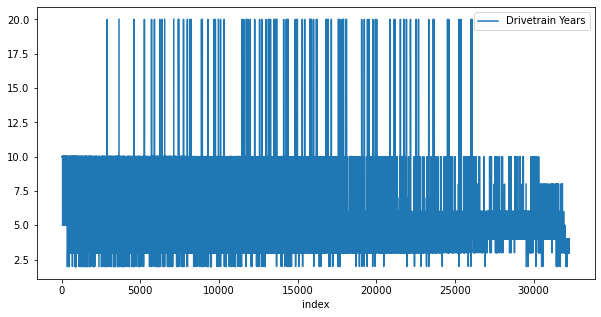

In [111]:
ax = plt.gca()
df.reset_index().plot(kind='line',x='index',y='Drivetrain Years',ax=ax)
plt.show()

Text(0, 0.5, 'avg MSRP')

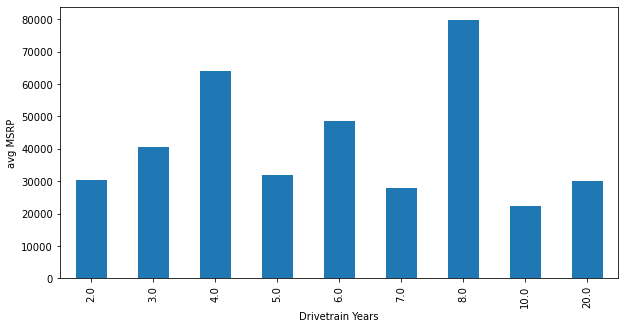

In [112]:
pr_plt = df.groupby('Drivetrain Years')['MSRP'].mean().plot(kind = 'bar')
pr_plt.set_ylabel("avg MSRP")

Text(0, 0.5, 'count of cars')

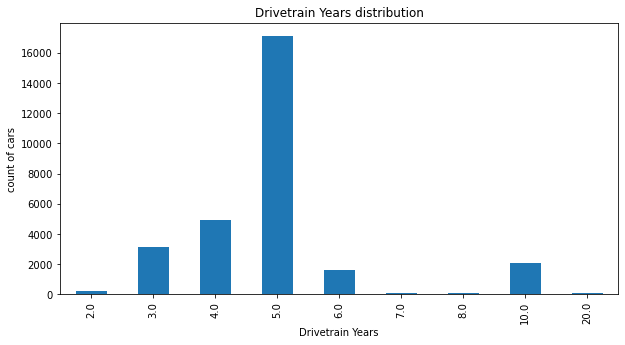

In [113]:
df.groupby('Drivetrain Years')['MSRP'].count().plot(kind = 'bar', title = 'Drivetrain Years distribution').set_ylabel("count of cars")

Most of the cars have warranty for 5,4,3,10,6 (descending order) warranty for Drivetrain. Based on the count and avg MSRP we can predict missing values

In [114]:
df.groupby('Drivetrain Years')['MSRP'].mean()

Drivetrain Years
2.0     30448.789256
3.0     40570.797785
4.0     63921.097358
5.0     31937.424971
6.0     48568.047066
7.0     27778.171429
8.0     79923.605634
10.0    22403.447619
20.0    29986.150000
Name: MSRP, dtype: float64

In [115]:
indexNames = df[df['Drivetrain Years'].isnull()].index
data_mean = df.groupby('Drivetrain Years', as_index=False)['MSRP'].mean()
data_mean_3 = data_mean.iloc[1]['MSRP']
data_mean_4 = data_mean.iloc[2]['MSRP']
data_mean_6 = data_mean.iloc[4]['MSRP']
data_mean_10 = data_mean.iloc[7]['MSRP']
count = 0
for idx in indexNames:
    if (df.iloc[idx]['MSRP'] >= data_mean_4):
        df.at[idx,'Drivetrain Years'] = 10.0
    elif (df.iloc[idx]['MSRP'] >= data_mean_6):
        df.at[idx,'Drivetrain Years'] = 6.0
    elif (df.iloc[idx]['MSRP'] >= data_mean_3):
        df.at[idx,'Drivetrain Years'] = 3.0
    elif (df.iloc[idx]['MSRP'] <= data_mean_10):
        df.at[idx,'Drivetrain Years'] = 10.0
    else :
        df.at[idx,'Drivetrain Years'] = 5.0


# Feature: Front Wheel Material

In [116]:
df['Front Wheel Material'].unique()

array([nan, 'Steel', 'Aluminum', 'Alloy', 'Carbon Fibre'], dtype=object)

Text(0, 0.5, 'avg MSRP')

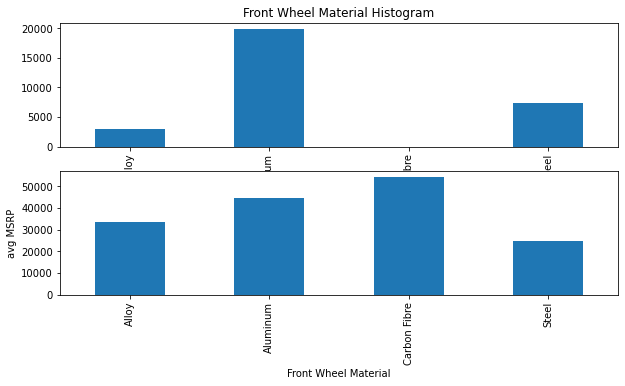

In [117]:
figr, axes = plt.subplots(2)
df.groupby('Front Wheel Material')['MSRP'].count().plot(ax=axes[0],kind = 'bar', title = 'Front Wheel Material Histogram')
pr_plt = df.groupby('Front Wheel Material')['MSRP'].mean().plot(ax=axes[1],kind = 'bar')
pr_plt.set_ylabel("avg MSRP")

Most of the cars Front Wheel material is of type Aluminium which is of highest average MSRP, followed by Steel and Alloy. We will fill the missing values based on avg MSRP

In [118]:
indexNames = df[df['Front Wheel Material'].isnull()].index
data_mean = df.groupby('Front Wheel Material', as_index=False)['MSRP'].mean()
data_mean_steel = data_mean.iloc[3]['MSRP']
data_mean_alloy = data_mean.iloc[0]['MSRP']
count = 0
for idx in indexNames:
    if (df.iloc[idx]['MSRP'] <= data_mean_steel):
        df.at[idx,'Front Wheel Material'] = 'Steel'
    elif (df.iloc[idx]['MSRP'] <= data_mean_steel):
        df.at[idx,'Front Wheel Material'] = 'Alloy'
    else :
        df.at[idx,'Front Wheel Material'] = 'Aluminum'


# Feature: Front tire aspect ratio

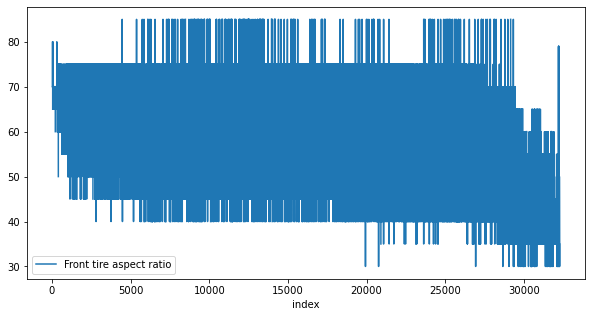

In [119]:
ax = plt.gca()
df.reset_index().plot(kind='line',x='index',y='Front tire aspect ratio',ax=ax)
plt.show()

In [120]:
df['Front tire aspect ratio'].unique()

array([nan, 80., 70., 65., 60., 75., 50., 55., 45., 40., 85., 30., 35.,
       79.])

Text(0, 0.5, 'avg MSRP')

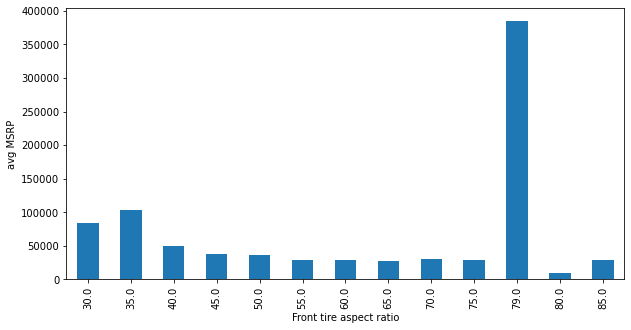

In [121]:
pr_plt = df.groupby('Front tire aspect ratio')['MSRP'].median().plot(kind = 'bar')
pr_plt.set_ylabel("avg MSRP")

Text(0, 0.5, 'count of cars')

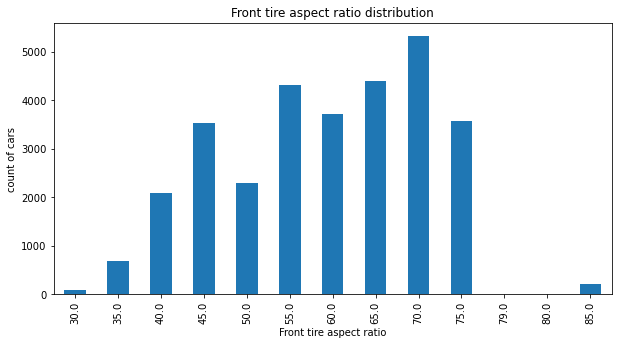

In [122]:
df.groupby('Front tire aspect ratio')['MSRP'].count().plot(kind = 'bar', title = 'Front tire aspect ratio distribution').set_ylabel("count of cars")

Text(0, 0.5, 'front-tire aspect ratio')

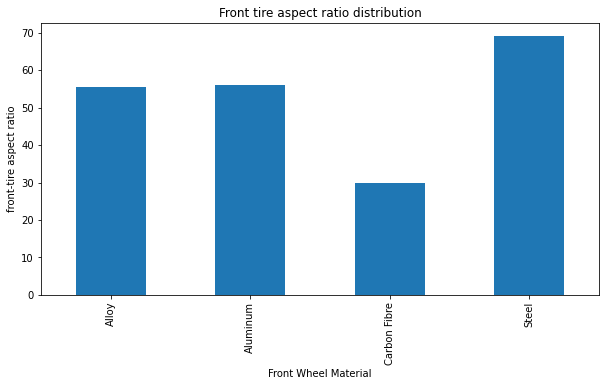

In [123]:
df.groupby('Front Wheel Material')['Front tire aspect ratio'].mean().plot(kind = 'bar', title = 'Front tire aspect ratio distribution').set_ylabel("front-tire aspect ratio")

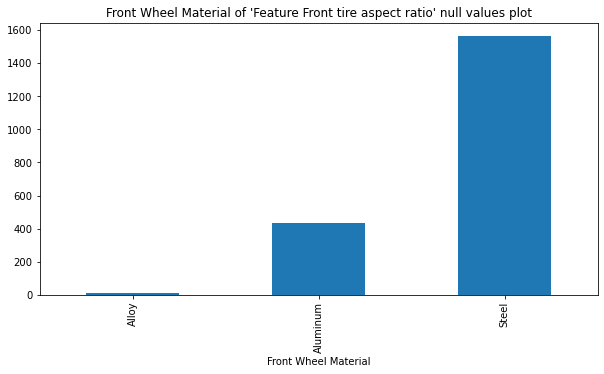

In [124]:
df[df['Front tire aspect ratio'].isnull()].groupby('Front Wheel Material')['MSRP'].count().plot(kind='bar', title = 'Front Wheel Material of \'Feature Front tire aspect ratio\' null values plot')

Considering just the avg MSRP wasn't sufficient to predict missing values of this feature. So we have tried to find relation between Front Wheel Material and Front - tire aspect ratio. Majority of missing Front Aspect ratio missing values are of type steel, followed by Aluminum. We can now check if this feature allows us to predict.

In [125]:
df[df['Front Wheel Material'] == 'Steel']['Front tire aspect ratio'].describe()

count    7386.000000
mean       69.180206
std         6.053375
min        50.000000
25%        65.000000
50%        70.000000
75%        75.000000
max        85.000000
Name: Front tire aspect ratio, dtype: float64

In [126]:
df[df['Front Wheel Material'] == 'Aluminum']['Front tire aspect ratio'].describe()

count    19902.000000
mean        56.014220
std         11.177436
min         30.000000
25%         45.000000
50%         55.000000
75%         65.000000
max         85.000000
Name: Front tire aspect ratio, dtype: float64

Front tire aspect ratio varies over 30 - 85 range. So we need another feature to narrow down to concrete values. 

Text(0, 0.5, 'Avg Wheelbase (in)')

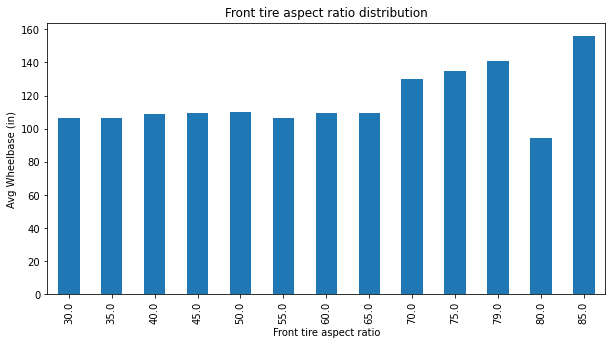

In [127]:
df.groupby('Front tire aspect ratio')['Wheelbase (in)'].median().plot(kind = 'bar', title = 'Front tire aspect ratio distribution').set_ylabel("Avg Wheelbase (in)")

Avg Wheelbase is almost the same over the range 30 - 65, so we can use uniform random distribution over certain ranges based on  Front Wheel Material. First category would be based on Wheelbase and next would be distributed values based on count of cars.

In [128]:
df.groupby('Front tire aspect ratio')['Wheelbase (in)'].median()

Front tire aspect ratio
30.0    106.7
35.0    106.7
40.0    108.7
45.0    109.3
50.0    110.2
55.0    106.4
60.0    109.3
65.0    109.3
70.0    130.0
75.0    135.0
79.0    140.6
80.0     94.5
85.0    156.2
Name: Wheelbase (in), dtype: float64

In [129]:
indexNames = df[df['Front tire aspect ratio'].isnull()].index
data_median = df.groupby('Front tire aspect ratio', as_index=False)['Wheelbase (in)'].median()
data_median_75 = data_median.iloc[9]['Wheelbase (in)']
data_median_50 = data_median.iloc[4]['Wheelbase (in)']
count = 0
for idx in indexNames:
    if (df.iloc[idx]['Wheelbase (in)'] >= data_median_75):
        df.at[idx,'Front tire aspect ratio'] = 75.0
    if (df.iloc[idx]['Wheelbase (in)'] <= data_median_50):
        count += 1
    else :
        df.at[idx,'Front tire aspect ratio'] = 70.0


In [130]:
cnt = df.groupby('Front tire aspect ratio', as_index=False)['MSRP'].count()
cnt1 = 0
cnt2 = 0
dist = []
for i in range(0,8):
    cnt1 += cnt.iloc[i]['MSRP']
    dist.append(cnt.iloc[i]['MSRP'])
for i in range(0,8):
    dist[i] = int(round(dist[i]*count/cnt1))
    cnt2 += dist[i]
dist[i]=dist[i]+count-cnt2
arr = []
for i in range(len(dist)):
    arr1 = np.full(shape=dist[i],fill_value=i+1,dtype=np.int)
    arr = np.hstack((arr, arr1))
np.random.shuffle(arr)
indexNames = df[df['Front tire aspect ratio'].isnull()].index
count2 = 0
for idx in indexNames:
    if (arr[count2]==1):
        df.at[idx,'Front tire aspect ratio'] = 30.0
    elif (arr[count2]==2):
        df.at[idx,'Front tire aspect ratio'] = 35.0
    elif (arr[count2]==3):
        df.at[idx,'Front tire aspect ratio'] = 40.0
    elif (arr[count2]==4):
        df.at[idx,'Front tire aspect ratio'] = 45.0
    elif (arr[count2]==5):
        df.at[idx,'Front tire aspect ratio'] = 50.0
    elif (arr[count2]==6):
        df.at[idx,'Front tire aspect ratio'] = 55.0
    elif (arr[count2]==7):
        df.at[idx,'Front tire aspect ratio'] = 60.0
    else:
        df.at[idx,'Front tire aspect ratio'] = 65.0
    count2+=1

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32262 entries, 0 to 32261
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MSRP                               32262 non-null  float64
 1   Engine                             32262 non-null  object 
 2   Drivetrain                         32262 non-null  object 
 3   Passenger Capacity                 32262 non-null  int64  
 4   Passenger Doors                    32262 non-null  int64  
 5   Wheelbase (in)                     32262 non-null  float64
 6   Fuel System                        32262 non-null  object 
 7   Displacement                       32262 non-null  float64
 8   Trans Description Cont.            32262 non-null  object 
 9   Trans Type                         32262 non-null  object 
 10  Suspension Type - Front            32262 non-null  object 
 11  Suspension Type - Rear             32262 non-null  obj

# Final Train/Test Data for Machine Learning(Regression Analysis)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32262 entries, 0 to 32261
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MSRP                               32262 non-null  float64
 1   Engine                             32262 non-null  object 
 2   Drivetrain                         32262 non-null  object 
 3   Passenger Capacity                 32262 non-null  int64  
 4   Passenger Doors                    32262 non-null  int64  
 5   Wheelbase (in)                     32262 non-null  float64
 6   Fuel System                        32262 non-null  object 
 7   Displacement                       32262 non-null  float64
 8   Trans Description Cont.            32262 non-null  object 
 9   Trans Type                         32262 non-null  object 
 10  Suspension Type - Front            32262 non-null  object 
 11  Suspension Type - Rear             32262 non-null  obj

Columns that need transformation to numerical data are mentioned below. As our target is to test/predict MSRP, we can assign integrals to category based on the frequency of each unique value.

In [133]:
print("Columns that are transformed from categorial to numerical")
for col in df.columns:
    if (df[col].dtype == object):
        labels = df[col].value_counts(ascending=True).index.tolist()
        codes = range(1,len(labels)+1)
        df[col].replace(labels,codes,inplace=True)
        print(col)

Columns that are transformed from categorial to numerical
Engine
Drivetrain
Fuel System
Trans Description Cont.
Trans Type
Suspension Type - Front
Suspension Type - Rear
Front Wheel Material
Manufacturer
Category
Front tire width


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32262 entries, 0 to 32261
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MSRP                               32262 non-null  float64
 1   Engine                             32262 non-null  int64  
 2   Drivetrain                         32262 non-null  int64  
 3   Passenger Capacity                 32262 non-null  int64  
 4   Passenger Doors                    32262 non-null  int64  
 5   Wheelbase (in)                     32262 non-null  float64
 6   Fuel System                        32262 non-null  int64  
 7   Displacement                       32262 non-null  float64
 8   Trans Description Cont.            32262 non-null  int64  
 9   Trans Type                         32262 non-null  int64  
 10  Suspension Type - Front            32262 non-null  int64  
 11  Suspension Type - Rear             32262 non-null  int

In [135]:
df.head()

,MSRP,Engine,Drivetrain,Passenger Capacity,Passenger Doors,Wheelbase (in),Fuel System,Displacement,Trans Description Cont.,Trans Type,...,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Front Wheel Material,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio,SAE Net @RPM
0,6929.0,13,4,0,0,111.0,3,2.5,3,7,...,12.0,36000.0,10.0,3,20,1990,4,37,70.0,64.066107
1,7149.0,13,4,0,0,124.9,3,2.5,3,7,...,12.0,36000.0,10.0,3,20,1991,4,37,70.0,66.100246
2,7399.0,13,4,0,0,110.5,3,2.5,2,7,...,12.0,36000.0,10.0,3,40,1990,4,37,70.0,68.411766
3,7599.0,13,4,0,0,111.3,3,2.5,3,7,...,12.0,36000.0,10.0,3,20,1992,4,37,70.0,70.260983
4,7709.0,13,4,0,0,113.5,3,2.5,3,7,...,12.0,36000.0,10.0,3,20,1991,4,37,70.0,71.278052


In [136]:
df.tail()

,MSRP,Engine,Drivetrain,Passenger Capacity,Passenger Doors,Wheelbase (in),Fuel System,Displacement,Trans Description Cont.,Trans Type,...,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Front Wheel Material,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio,SAE Net @RPM
32257,497650.0,6,1,2,2,106.3,3,6.5,2,4,...,3.0,150000.0,3.0,4,5,2014,4,38,35.0,1228.0
32258,497650.0,6,1,2,2,106.3,3,6.5,2,4,...,3.0,150000.0,3.0,4,5,2015,4,38,35.0,1228.0
32259,535500.0,6,1,2,2,106.3,3,6.5,2,4,...,3.0,150000.0,3.0,4,5,2016,4,38,30.0,1248.0
32260,548800.0,6,1,2,2,106.3,3,6.5,2,4,...,3.0,150000.0,3.0,4,5,2014,4,38,35.0,1199.0
32261,548800.0,6,1,2,2,106.3,3,6.5,2,4,...,3.0,150000.0,3.0,4,5,2015,4,38,35.0,1228.0


NORMALIZE DATA

In [137]:

#excluding first column 'MSRP' from predictor set and adding it to the target and consider first ten and last ten columns for data visualization and 20 percent of rows between
df_y = df['MSRP']
df_X = df[df.columns[1:]]

col_s = df_X.columns[:10]
col_e = df_X.columns[-10:]
cols = col_s.append(col_e)
df_X_temp = df_X[cols]
num_rows = int((len(df_X_temp.index))*0.3)
df_X_ts = df_X_temp[-num_rows:]
df_y_temp = df_y[-num_rows:]
df_X_t = df_X[-num_rows:]
df_y_t = df_y_temp.to_numpy()
attributes = cols

#scatter_matrix(df_X_ts[attributes], figsize = (15,15), c = df_y_t, alpha = 0.8, marker = 'O')

In [138]:
df_X_t.head()

,Engine,Drivetrain,Passenger Capacity,Passenger Doors,Wheelbase (in),Fuel System,Displacement,Trans Description Cont.,Trans Type,Suspension Type - Front,...,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Front Wheel Material,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio,SAE Net @RPM
22584,13,3,5,4,111.0,2,2.0,3,6,9,...,12.0,50000.0,4.0,4,6,2018,4,42,45.0,586.0
22585,13,3,5,4,111.0,2,2.0,3,6,9,...,12.0,50000.0,4.0,4,6,2018,4,42,50.0,586.0
22586,11,2,6,4,149.0,3,5.7,3,6,9,...,5.0,60000.0,5.0,3,33,2019,3,41,70.0,805.0
22587,12,1,5,4,109.3,2,3.5,3,3,10,...,5.0,70000.0,6.0,4,21,2019,4,42,50.0,557.0
22588,13,1,4,2,108.3,2,2.0,3,9,5,...,12.0,50000.0,4.0,4,34,2011,4,43,40.0,469.0


# Standard Scaler
$$x_{new} = \frac{x - mean}{std}$$

In [140]:

X_train_raw, X_test_raw, y_train, y_test = train_test_split(df_X_t,df_y_t, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
df_X_s = scaler.transform(df_X_t)

norm = np.linalg.norm(df_y_t)
df_y_s = df_y_t/norm

# Regression

## Bagging and Pasting

In [138]:

r_reg = Ridge(alpha = 0.01, fit_intercept=True, normalize=True, solver='lsqr')
bag_reg = BaggingRegressor(r_reg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

In [157]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(bag_reg, df_X_s, df_y_t, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mean_sq_err = np.mean(scores)
std = np.std(scores)
print('Mean MSE: %.3f (%.3f)' % (mean_sq_err, std))

Mean MSE: -891177629.380 (210946632.992)


In [139]:
bag_reg.score(df_X_s,df_y_t)

0.6292443038371913

Text(0, 0.5, 'Predicted values')

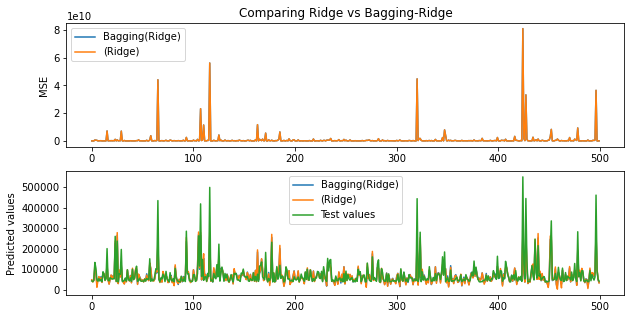

In [199]:
estimators = [("Ridge", r_reg),
              ("Bagging(Ridge)", BaggingRegressor(r_reg, n_estimators=500, max_samples=500, bootstrap=True, n_jobs=-1, random_state=0))]
n_estimators = len(estimators)

fig, ax = plt.subplots(2)
# Plot figures
x_axis = range(500)
color = ['r','g','b']

y_err = np.zeros((500))
y_err_l = np.zeros((500))
y_predict = np.zeros((500))
y_predict_l = np.zeros((500))
# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):

    estimator.fit(X_train, y_train)
    y_predict = estimator.predict(X_test)
    for i in range(500):
        y_err[i] = (y_test[i] - y_predict[i]) ** 2
    if (n==0):
        y_err_l = y_err
        y_predict_l = y_predict

plt1 = ax[0].plot(x_axis, y_err[:500], x_axis, y_err_l[:500])
ax[0].set_ylabel("MSE")
ax[0].set_title("Comparing Ridge vs Bagging-Ridge")
ax[0].legend(plt1[:2], ['Bagging(Ridge)', '(Ridge)'])
plt2 = ax[1].plot(x_axis, y_predict[:500],x_axis, y_predict_l[:500],x_axis,y_test[:500])
ax[1].legend(plt2[:3], ['Bagging(Ridge)', '(Ridge)','Test values'])
ax[1].set_ylabel("Predicted values")

In [168]:
l_reg = Lasso(alpha = 6)
bag_reg = BaggingRegressor(l_reg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

In [159]:
bag_reg.score(df_X_s,df_y_t)

0.6293165564623071

In [170]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(bag_reg, df_X_t, df_y_t, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mean_sq_err = np.mean(scores)
std = np.std(scores)
print('Mean MSE: %.3f (%.3f)' % (mean_sq_err, std))

Mean MSE: -606322141.789 (138806938.327)


Text(0, 0.5, 'Predicted values')

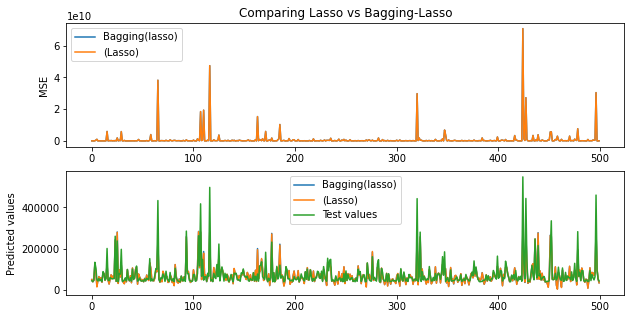

In [198]:
estimators = [("Lasso", l_reg),
              ("Bagging(Lasso)", BaggingRegressor(l_reg, n_estimators=500, max_samples=500, bootstrap=True, n_jobs=-1, random_state=0))]
n_estimators = len(estimators)

fig, ax = plt.subplots(2)
# Plot figures
x_axis = range(500)
color = ['r','g','b']

y_err = np.zeros((500))
y_err_l = np.zeros((500))
y_predict = np.zeros((500))
y_predict_l = np.zeros((500))
# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):

    estimator.fit(X_train, y_train)
    y_predict = estimator.predict(X_test)
    for i in range(500):
        y_err[i] = (y_test[i] - y_predict[i]) ** 2
    if (n==0):
        y_err_l = y_err
        y_predict_l = y_predict

plt1 = ax[0].plot(x_axis, y_err[:500], x_axis, y_err_l[:500])
ax[0].set_ylabel("MSE")
ax[0].set_title("Comparing Lasso vs Bagging-Lasso")
ax[0].legend(plt1[:2], ['Bagging(lasso)', '(Lasso)'])
plt2 = ax[1].plot(x_axis, y_predict[:500],x_axis, y_predict_l[:500],x_axis,y_test[:500])
ax[1].legend(plt2[:3], ['Bagging(lasso)', '(Lasso)','Test values'])
ax[1].set_ylabel("Predicted values")


In [267]:

r_reg = Ridge(alpha = 0.01, fit_intercept=True, normalize=True, solver='lsqr')
bag_reg = BaggingRegressor(r_reg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

In [268]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(bag_reg, df_X_s, df_y_t, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mean_sq_err = np.mean(scores)
std = np.std(scores)
print('Mean MSE: %.3f (%.3f)' % (mean_sq_err, std))

Mean MSE: -869434506.641 (203201640.396)


<IPython.core.display.Javascript object>


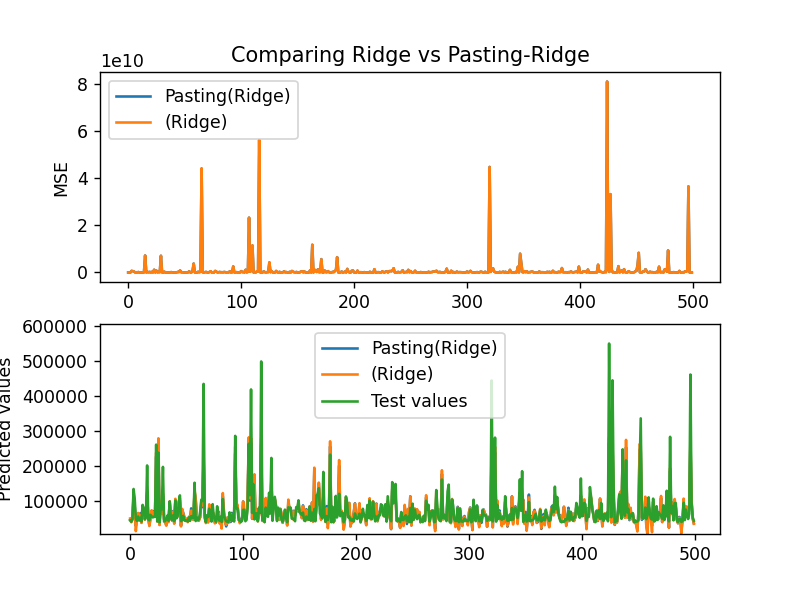

Text(0, 0.5, 'Predicted values')

In [270]:
estimators = [("Ridge", r_reg),
              ("Pasting(Ridge)", BaggingRegressor(r_reg, n_estimators=500, max_samples=500, bootstrap=True, n_jobs=-1, random_state=0))]
n_estimators = len(estimators)

fig, ax = plt.subplots(2)
# Plot figures
x_axis = range(500)
color = ['r','g','b']

y_err = np.zeros((500))
y_err_l = np.zeros((500))
y_predict = np.zeros((500))
y_predict_l = np.zeros((500))
# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):

    estimator.fit(X_train, y_train)
    y_predict = estimator.predict(X_test)
    for i in range(500):
        y_err[i] = (y_test[i] - y_predict[i]) ** 2
    if (n==0):
        y_err_l = y_err
        y_predict_l = y_predict

plt1 = ax[0].plot(x_axis, y_err[:500], x_axis, y_err_l[:500])
ax[0].set_ylabel("MSE")
ax[0].set_title("Comparing Ridge vs Pasting-Ridge")
ax[0].legend(plt1[:2], ['Pasting(Ridge)', '(Ridge)'])
plt2 = ax[1].plot(x_axis, y_predict[:500],x_axis, y_predict_l[:500],x_axis,y_test[:500])
ax[1].legend(plt2[:3], ['Pasting(Ridge)', '(Ridge)','Test values'])
ax[1].set_ylabel("Predicted values")

## Pasting

In [271]:
l_reg = Lasso(alpha = 6)
bag_reg = BaggingRegressor(l_reg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

In [272]:
bag_reg.score(df_X_s,df_y_t)

0.7390276115642282

In [273]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(bag_reg, df_X_t, df_y_t, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mean_sq_err = np.mean(scores)
std = np.std(scores)
print('Mean MSE: %.3f (%.3f)' % (mean_sq_err, std))

Mean MSE: -605482266.991 (131028333.143)


<IPython.core.display.Javascript object>


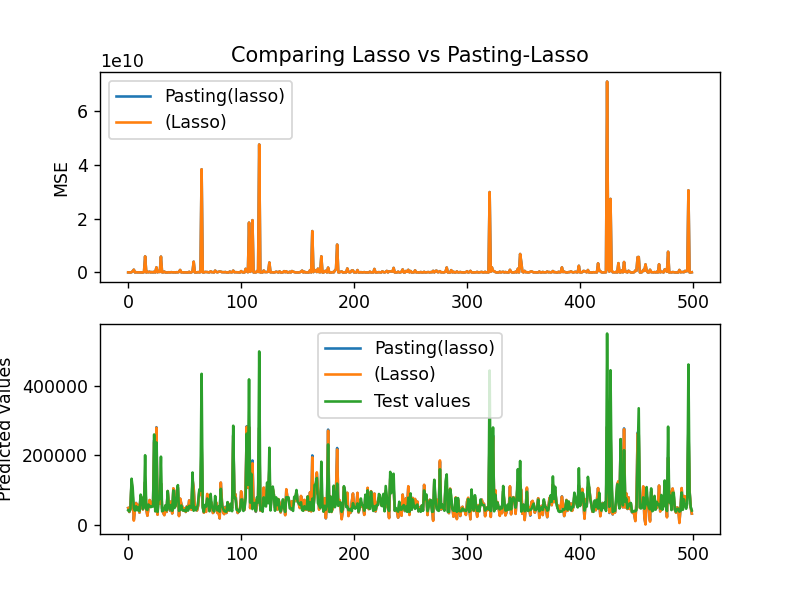

Text(0, 0.5, 'Predicted values')

In [274]:
estimators = [("Lasso", l_reg),
              ("Pasting(Lasso)", BaggingRegressor(l_reg, n_estimators=500, max_samples=500, bootstrap=True, n_jobs=-1, random_state=0))]
n_estimators = len(estimators)

fig, ax = plt.subplots(2)
# Plot figures
x_axis = range(500)
color = ['r','g','b']

y_err = np.zeros((500))
y_err_l = np.zeros((500))
y_predict = np.zeros((500))
y_predict_l = np.zeros((500))
# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):

    estimator.fit(X_train, y_train)
    y_predict = estimator.predict(X_test)
    for i in range(500):
        y_err[i] = (y_test[i] - y_predict[i]) ** 2
    if (n==0):
        y_err_l = y_err
        y_predict_l = y_predict

plt1 = ax[0].plot(x_axis, y_err[:500], x_axis, y_err_l[:500])
ax[0].set_ylabel("MSE")
ax[0].set_title("Comparing Lasso vs Pasting-Lasso")
ax[0].legend(plt1[:2], ['Pasting(lasso)', '(Lasso)'])
plt2 = ax[1].plot(x_axis, y_predict[:500],x_axis, y_predict_l[:500],x_axis,y_test[:500])
ax[1].legend(plt2[:3], ['Pasting(lasso)', '(Lasso)','Test values'])
ax[1].set_ylabel("Predicted values")


### AdaBoost

In [275]:

r_reg = Ridge(alpha = 0.01, fit_intercept=True, normalize=True, solver='lsqr')

ada_reg = AdaBoostRegressor(r_reg, n_estimators=200, learning_rate=0.5, random_state=0)
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=Ridge(alpha=0.01, normalize=True,
                                       solver='lsqr'),
                  learning_rate=0.5, n_estimators=200, random_state=0)

In [276]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(ada_reg, df_X_t, df_y_t, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mean_sq_err = np.mean(scores)
std = np.std(scores)
print('Mean MSE: %.3f (%.3f)' % (mean_sq_err, std))

Mean MSE: -929264388.760 (91688366.196)


<IPython.core.display.Javascript object>


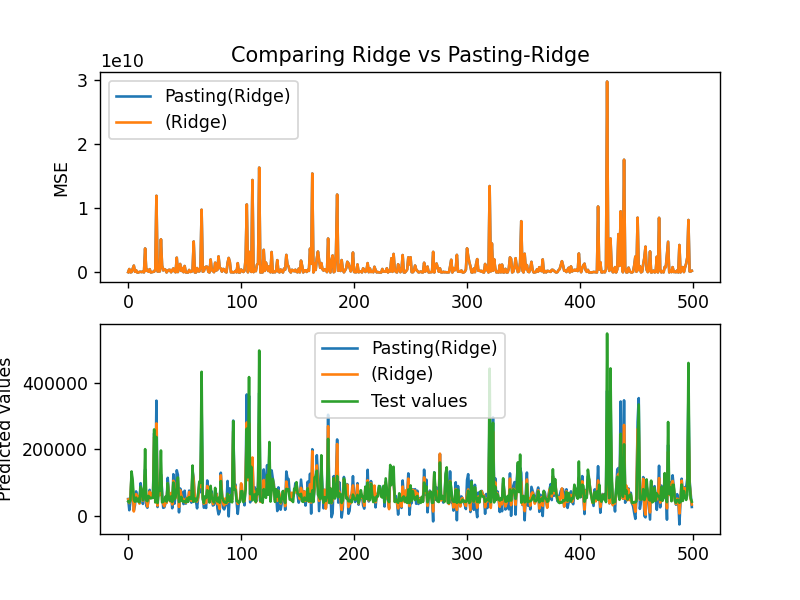

Text(0, 0.5, 'Predicted values')

In [277]:
estimators = [("Ridge", r_reg),
              ("AdaBoost(Ridge)", AdaBoostRegressor(r_reg, n_estimators=200, learning_rate=0.5, random_state=0))]
n_estimators = len(estimators)

fig, ax = plt.subplots(2)
# Plot figures
x_axis = range(500)
color = ['r','g','b']

y_err = np.zeros((500))
y_err_l = np.zeros((500))
y_predict = np.zeros((500))
y_predict_l = np.zeros((500))
# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):

    estimator.fit(X_train, y_train)
    y_predict = estimator.predict(X_test)
    for i in range(500):
        y_err[i] = (y_test[i] - y_predict[i]) ** 2
    if (n==0):
        y_err_l = y_err
        y_predict_l = y_predict

plt1 = ax[0].plot(x_axis, y_err[:500], x_axis, y_err_l[:500])
ax[0].set_ylabel("MSE")
ax[0].set_title("Comparing Ridge vs Pasting-Ridge")
ax[0].legend(plt1[:2], ['Pasting(Ridge)', '(Ridge)'])
plt2 = ax[1].plot(x_axis, y_predict[:500],x_axis, y_predict_l[:500],x_axis,y_test[:500])
ax[1].legend(plt2[:3], ['Pasting(Ridge)', '(Ridge)','Test values'])
ax[1].set_ylabel("Predicted values")

In [278]:

l_reg = lasso = Lasso(alpha = 6)

ada_reg = AdaBoostRegressor(l_reg, n_estimators=200, learning_rate=0.5, random_state=0)
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=Lasso(alpha=6), learning_rate=0.5,
                  n_estimators=200, random_state=0)

In [279]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(ada_reg, df_X_t, df_y_t, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mean_sq_err = np.mean(scores)
std = np.std(scores)
print('Mean MSE: %.3f (%.3f)' % (mean_sq_err, std))

Mean MSE: -939352531.574 (97394804.847)


<IPython.core.display.Javascript object>


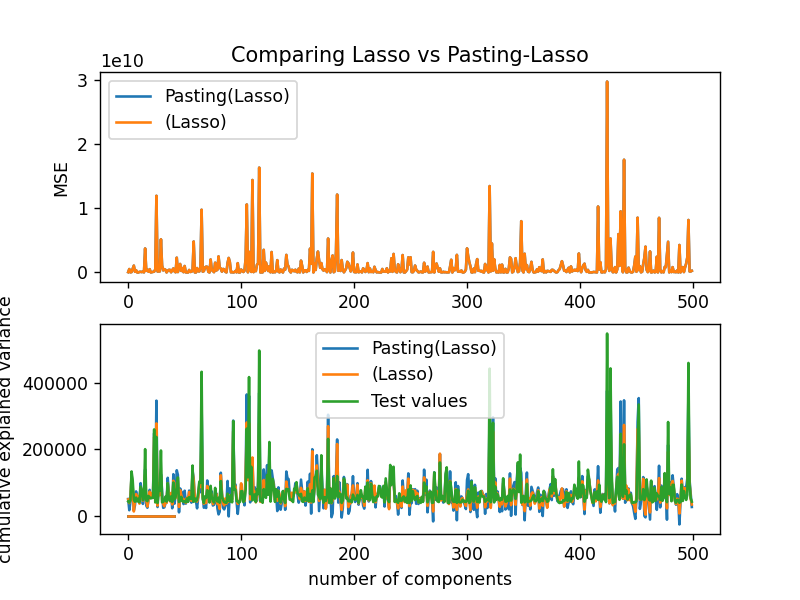

Text(0, 0.5, 'Predicted values')

In [280]:
estimators = [("Lasso", r_reg),
              ("AdaBoost(Lasso)", AdaBoostRegressor(r_reg, n_estimators=200, learning_rate=0.5, random_state=0))]
n_estimators = len(estimators)

fig, ax = plt.subplots(2)
# Plot figures
x_axis = range(500)
color = ['r','g','b']

y_err = np.zeros((500))
y_err_l = np.zeros((500))
y_predict = np.zeros((500))
y_predict_l = np.zeros((500))
# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):

    estimator.fit(X_train, y_train)
    y_predict = estimator.predict(X_test)
    for i in range(500):
        y_err[i] = (y_test[i] - y_predict[i]) ** 2
    if (n==0):
        y_err_l = y_err
        y_predict_l = y_predict

plt1 = ax[0].plot(x_axis, y_err[:500], x_axis, y_err_l[:500])
ax[0].set_ylabel("MSE")
ax[0].set_title("Comparing Lasso vs Pasting-Lasso")
ax[0].legend(plt1[:2], ['Pasting(Lasso)', '(Lasso)'])
plt2 = ax[1].plot(x_axis, y_predict[:500],x_axis, y_predict_l[:500],x_axis,y_test[:500])
ax[1].legend(plt2[:3], ['Pasting(Lasso)', '(Lasso)','Test values'])
ax[1].set_ylabel("Predicted values")

# GradientBoostingRegressor

In [247]:

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(df_X_s[:, 0].reshape(-1,1), df_y_s)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [248]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(df_X_s[:, 0].reshape(-1,1), df_y_s)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

In [249]:
def  plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

<IPython.core.display.Javascript object>


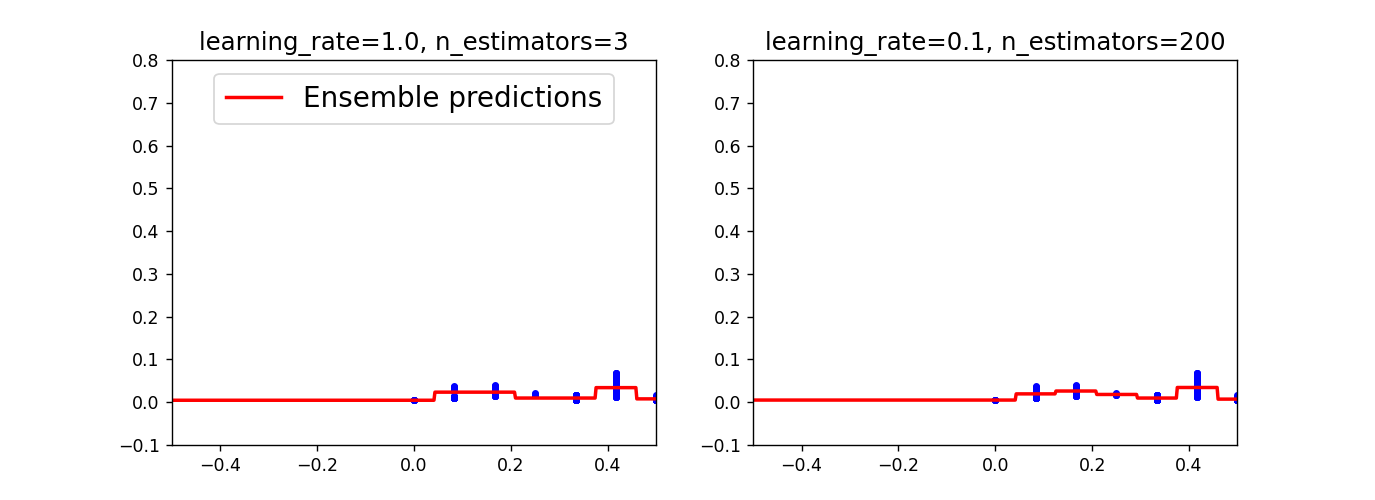

In [250]:
%matplotlib notebook
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], df_X_s, df_y_s, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], df_X_s, df_y_s, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

plt.show()

# PCA 

By using Principal Component Analysis (PCA),a linear dimensionality reduction technique we are extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space by tring to preserve the essential parts that have more variation of the data and discarding other with fewer variation

In [141]:

pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [142]:
d

25

In [483]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [484]:
pca.n_components_

25

In [485]:
np.sum(pca.explained_variance_ratio_)

0.950120250103558

## PCA using SVD decomposition

In [486]:
X_centered  = X_train - X_train.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [487]:
m, n = X_train.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [488]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [489]:
W2 = Vt.T[:, :25]
X2D = X_centered.dot(W2)

In [490]:
X2D_using_svd = X2D

In [491]:
X2D_using_svd[:2]

array([[-0.72609253,  0.93920851, -1.27633259,  0.20829792, -0.04819992,
        -0.45389593, -0.05696524,  0.22274823, -0.06149162, -0.20001853,
        -0.01103122, -0.11294176, -0.5515122 , -0.37507831, -0.03608515,
         0.49005361, -0.36559904, -0.56710044,  0.01968652, -0.22780874,
         0.23287956,  0.11523445, -0.08153081, -0.16633716, -0.06453191],
       [-1.38540132, -0.00172038, -0.08398179, -0.31324197, -0.80715436,
        -0.1287042 , -0.10158322, -0.05799802,  0.85783458,  0.19793162,
        -0.39454718,  0.12277817,  0.40986356, -0.26000818, -0.12987551,
        -0.16734615, -0.35253927, -0.0349061 ,  0.08161436,  0.37783902,
         0.04368393,  0.24093457, -0.28230494, -0.03382945,  0.0017122 ]])

In [492]:
X_centered  = X_test - X_test.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [493]:
m, n = X_test.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [494]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [495]:
W2 = Vt.T[:, :25]
X2D = X_centered.dot(W2)

In [496]:
X2D_test_using_svd = X2D

In [497]:
X2D_using_svd[:2]

array([[-0.72609253,  0.93920851, -1.27633259,  0.20829792, -0.04819992,
        -0.45389593, -0.05696524,  0.22274823, -0.06149162, -0.20001853,
        -0.01103122, -0.11294176, -0.5515122 , -0.37507831, -0.03608515,
         0.49005361, -0.36559904, -0.56710044,  0.01968652, -0.22780874,
         0.23287956,  0.11523445, -0.08153081, -0.16633716, -0.06453191],
       [-1.38540132, -0.00172038, -0.08398179, -0.31324197, -0.80715436,
        -0.1287042 , -0.10158322, -0.05799802,  0.85783458,  0.19793162,
        -0.39454718,  0.12277817,  0.40986356, -0.26000818, -0.12987551,
        -0.16734615, -0.35253927, -0.0349061 ,  0.08161436,  0.37783902,
         0.04368393,  0.24093457, -0.28230494, -0.03382945,  0.0017122 ]])

## PCA using Scikit-Learn

In [498]:

pca = PCA(n_components = 25)
X2D = pca.fit_transform(X_train)

In [499]:
X2D[:2]

array([[ 0.72609253, -0.93920851,  1.27633259,  0.20829791, -0.04819992,
         0.45389594,  0.05696524, -0.22274826, -0.06149161,  0.20001835,
         0.01103138, -0.11294211,  0.55151211, -0.37507947, -0.03608477,
         0.49005337, -0.36560067,  0.56710031, -0.01968484, -0.22780655,
         0.23287597, -0.11522877,  0.08156409,  0.1663008 ,  0.06446308],
       [ 1.38540132,  0.00172038,  0.08398176, -0.31324198, -0.80715438,
         0.12870417,  0.10158333,  0.05799836,  0.85783461, -0.19793107,
         0.39454636,  0.12277983, -0.40986479, -0.26000115, -0.12987405,
        -0.16734817, -0.35253048,  0.03491244, -0.08159605,  0.37779954,
         0.04368715, -0.24097022,  0.28216459,  0.03377288, -0.00140176]])

In [500]:
np.allclose(X2D, X2D_using_svd)

False

In [501]:
X3D_inv = pca.inverse_transform(X2D)

In [502]:
np.allclose(X3D_inv, X_train)

False

In [143]:
pca = PCA(n_components = 25)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [144]:
X_train_reduced_pca = X_reduced

In [145]:
X_reduced = pca.fit_transform(X_test)
X_recovered = pca.inverse_transform(X_reduced)

In [146]:
X_test_reduced_pca = X_reduced

In [147]:
X_reduced = pca.fit_transform(df_X_s)
df_X_pca = X_reduced

## PCA

In [508]:
pca.components_

array([[-0.02463953,  0.07248459, -0.06104394, ..., -0.01579353,
         0.02969175, -0.00691896],
       [ 0.02055126,  0.02030544,  0.08062577, ..., -0.07353401,
         0.21253485, -0.02921509],
       [-0.0174468 ,  0.21712109, -0.00909895, ..., -0.05083304,
         0.0441051 ,  0.07305505],
       ...,
       [ 0.19733107, -0.10208237, -0.04089161, ...,  0.08248077,
         0.13426669, -0.06687215],
       [ 0.24729899,  0.05743555,  0.10681005, ...,  0.0620256 ,
         0.14615144, -0.13053967],
       [-0.04183405, -0.00346509, -0.03562472, ..., -0.15570099,
        -0.07414587,  0.01223529]])

In [509]:
Vt[:2]

array([[ 0.02445885, -0.07238743,  0.05900389,  0.16932775,  0.01314144,
        -0.02773212, -0.06131213,  0.06217977, -0.03757706,  0.06269423,
         0.05485314,  0.00578142,  0.01514353, -0.01701079,  0.20662594,
         0.04219194,  0.36159155,  0.42561052, -0.00141659,  0.37521456,
         0.18515128,  0.1139696 ,  0.00170012, -0.05614153, -0.01365615,
         0.31151431,  0.24439402,  0.40110935,  0.17069509, -0.00701128,
         0.0275202 ,  0.08672248, -0.01891935, -0.00147688,  0.00095629,
         0.03226965, -0.03363756,  0.16892476, -0.09427158,  0.01919721,
        -0.03610421,  0.0044818 ],
       [-0.02645712, -0.02733757, -0.07919264, -0.15399115, -0.11498976,
        -0.07598546, -0.10936991, -0.10055133, -0.15982732,  0.08297148,
         0.04253027,  0.00116225,  0.00338928,  0.03279733,  0.14291319,
         0.0873691 , -0.03707879, -0.13708902, -0.00523577, -0.26589418,
         0.42953597,  0.0819539 ,  0.00494672,  0.15224559, -0.60488386,
        -0.04193

In [510]:
pca.explained_variance_ratio_

array([0.22120001, 0.10221313, 0.07457335, 0.06785228, 0.05545654,
       0.05009129, 0.04358921, 0.03599367, 0.03543645, 0.03114782,
       0.02719434, 0.02594856, 0.02246223, 0.01991452, 0.01840677,
       0.01644553, 0.01597328, 0.01447162, 0.01345984, 0.01207842,
       0.01191616, 0.0107407 , 0.00880228, 0.00795602, 0.0073928 ])

In [511]:
1 - pca.explained_variance_ratio_.sum()

0.049283178233757274

In [225]:
app = JupyterDash(__name__)

app.layout = html.Div([
    dcc.Graph(id="graph"),
    html.P("Number of components:"),
    dcc.Slider(
        id='slider',
        min=2, max=5, value=3,
        marks={i: str(i) for i in range(2,6)})
])

@app.callback(
    Output("graph", "figure"), 
    [Input("slider", "value")])
def run_and_plot(n_components):
    pca = PCA(n_components=n_components+20)
    components = pca.fit_transform(X_train[:100,:])

    var = pca.explained_variance_ratio_.sum() * 100

    labels = {str(i): f"PC {i+1}" 
              for i in range(n_components)}
    labels['color'] = 'Median Price'

    fig = px.scatter_matrix(
        components,
        color=y_train[:100],
        dimensions=range(n_components),
        labels=labels,
        title=f'Depicting first {n_components:d} components of total num_components in PCA {n_components+20:d} - Total Explained Variance: {var:.2f}%')
    fig.update_traces(diagonal_visible=False)
    return fig

app.run_server(mode='inline')

# Regression Analysis

We use reg_scores list to store regressor name,test/train score and cross_val MSE

In [201]:
reg_scores = []

# K Neighbors Regressor

Text(0, 0.5, 'MSE')

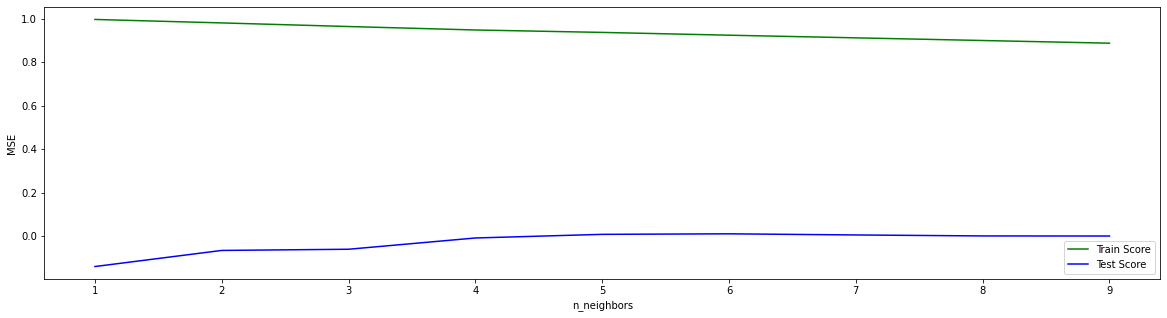

In [513]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_reduced_pca, y_train)
    train_score_array.append(knn_reg.score(X_train_reduced_pca, y_train))
    test_score_array.append(knn_reg.score(X_test_reduced_pca, y_test))

x_axis = range(1,10)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('MSE')

In [514]:
print(train_score_array)
print(test_score_array)

[0.9973853209506146, 0.9814129234308437, 0.9648029147025192, 0.9488485402034849, 0.9376826117265011, 0.9248221746900201, 0.912633008611635, 0.9003765951123541, 0.8880360460297918]
[-0.14097591177953195, -0.06675122088147156, -0.061301703903051896, -0.00941682878714789, 0.007329549485724063, 0.009775017212197534, 0.004538737489837574, 1.0744689174613242e-05, -0.00041948604462804795]


In [515]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9]}

model = GridSearchCV(KNeighborsRegressor(), params, cv=5)
model.fit(X_train_reduced_pca,y_train)
print(model.best_params_)

{'n_neighbors': 1}


In [609]:
knn_reg = KNeighborsRegressor(1)
knn_reg.fit(X_train_reduced_pca, y_train)
train_score = knn_reg.score(X_train_reduced_pca, y_train)
test_score = knn_reg.score(X_test_reduced_pca, y_test)
print(train_score)
print(test_score)

0.9973853209506146
-0.14097591177953195


In [610]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(knn_reg, df_X_pca, df_y_t, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mean_sq_err = np.mean(scores)
std = np.std(scores)
print('Mean MSE: %.3f (%.3f)' % (mean_sq_err, std))

Mean MSE: -160771951.639 (49781009.482)


In [611]:
reg_scores.append(['K Nearest Regressor',train_score,test_score,mean_sq_err,std])

# Linear regression

In [612]:
lreg = LinearRegression()
lreg.fit(X_train_reduced_pca, y_train)
train_score = lreg.score(X_train_reduced_pca, y_train)
test_score = lreg.score(X_test_reduced_pca, y_test)
print(train_score)
print(test_score)

0.5936278690285122
-0.2388201344254679


Text(0.5, 0, 'RM')

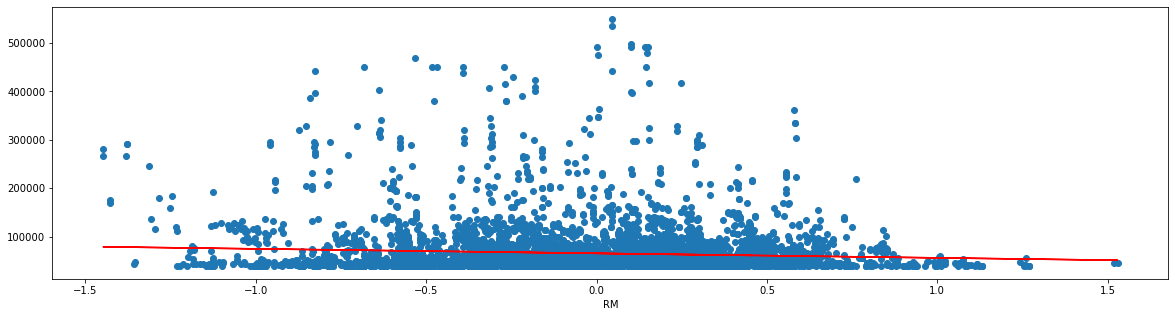

In [520]:
%matplotlib inline

X_train_rm = X_train_reduced_pca[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

In [613]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lreg, df_X_pca, df_y_t, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mean_sq_err = np.mean(scores)
std = np.std(scores)
print('Mean MSE: %.3f (%.3f)' % (mean_sq_err, std))

Mean MSE: -934664415.763 (149223125.122)


In [614]:
reg_scores.append(['Linear Regression',train_score,test_score,mean_sq_err,std])

# Ridge

In [527]:
train_score_list = []
test_score_list = []

for alpha in [0.01, 0.1, 1, 10, 100]: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced_pca,  y_train)
    train_score_list.append(ridge.score(X_train_reduced_pca, y_train))
    test_score_list.append(ridge.score(X_test_reduced_pca, y_test))

This model has scaling parameter(s), let's first visualize for various alpha values

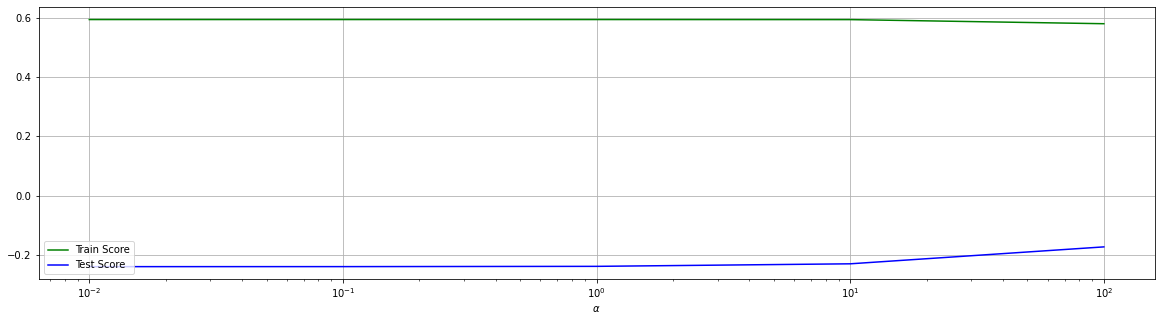

In [528]:
%matplotlib inline

x_range = [0.01, 0.1, 1, 10, 100]

plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

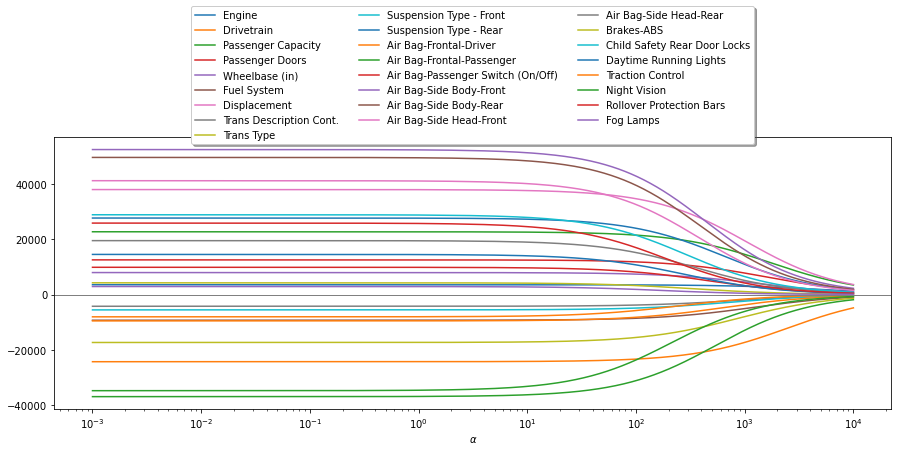

In [532]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced_pca,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,len(df_X_pca[0])):
    plt.plot(x_range, coeff[:,i], label = 'PCA_'+ str(i+1))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

Using GridSearch to find best hyper parameter

In [534]:
# Evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# Search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
# define search
search = GridSearchCV(Ridge(), space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train_reduced_pca, y_train)
print('Best Hyperparameters: %s' % result.best_params_)

Best Hyperparameters: {'alpha': 100, 'fit_intercept': True, 'normalize': False, 'solver': 'lsqr'}


In [615]:
ridge = Ridge(alpha = 100, fit_intercept=True, normalize=True, solver='lsqr')
ridge.fit(X_train_reduced_pca,y_train)
train_score = ridge.score(X_train_reduced_pca, y_train)
test_score = ridge.score(X_test_reduced_pca, y_test)
print('Train score: {:.4f}'.format(train_score))
print('Test score: {:.4f}'.format(test_score))

Train score: 0.0117
Test score: 0.0031


In [536]:
ridge.coef_

array([  35.03613216, -241.02004212,  224.97647937,  124.20834538,
         78.69368625,  -92.27697412,  376.32798711,  -42.19229019,
       -172.06304147,  -55.18961381,  274.23675997,  -94.65730797,
       -366.29072214,   97.59756674,  519.80858143,  491.58886808,
        408.13396587,  193.18899027,   41.90648213,  285.9868949 ,
        143.75547762,  -80.04186695, -344.91278747,  256.10611049,
         28.63333998])

In [537]:
ridge.intercept_

65280.508404519154

In [616]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(ridge, df_X_pca, df_y_t, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mean_sq_err = np.mean(scores)
std = np.std(scores)
print('Mean MSE: %.3f (%.3f)' % (mean_sq_err, std))

Mean MSE: -2274246167.265 (390880450.705)


In [617]:
reg_scores.append(['Ridge',train_score,test_score,mean_sq_err,std])

# LASSO

In [540]:
a_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in a_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced_pca,y_train)
    train_score_list.append(lasso.score(X_train_reduced_pca,y_train))
    test_score_list.append(lasso.score(X_test_reduced_pca, y_test))

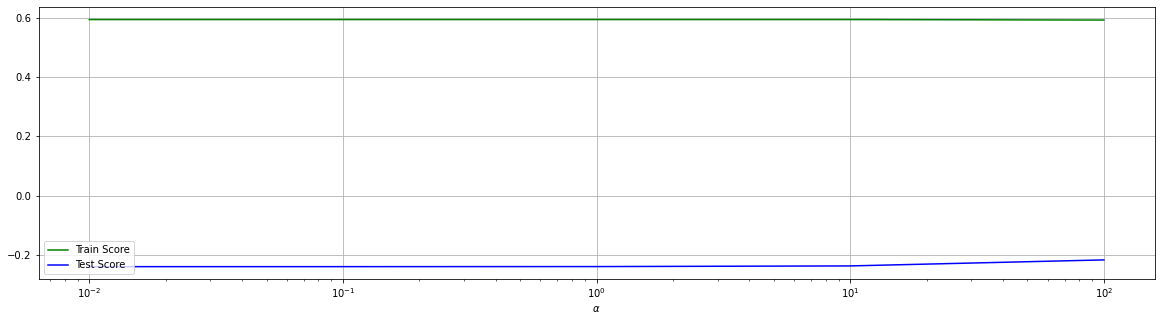

In [541]:
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(a_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(a_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

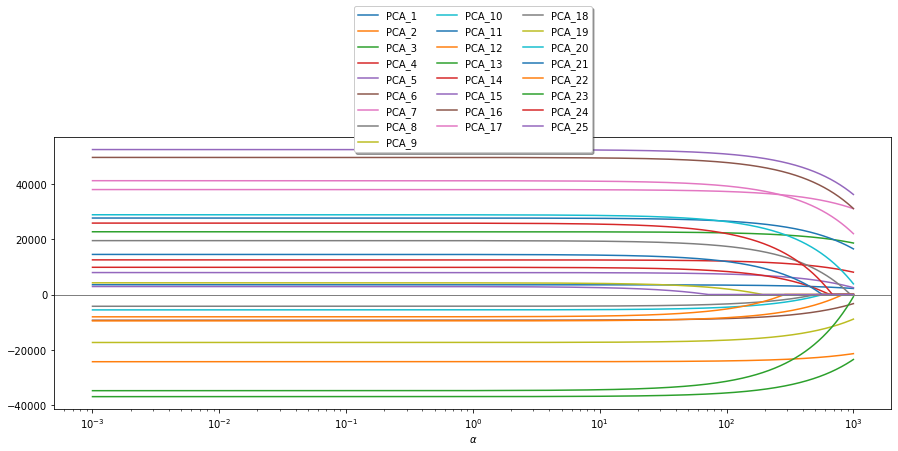

In [542]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced_pca,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,len(df_X_pca[0])):
    plt.plot(x_range, coeff[:,i], label = 'PCA_'+ str(i+1))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

Using GridSearch to find best hyper parameter

In [543]:
space = dict()
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
search = GridSearchCV(Lasso(), space, scoring='r2')
# execute search
result = search.fit(X_train_reduced_pca, y_train)
print('Best Hyperparameters: %s' % result.best_params_)

Best Hyperparameters: {'alpha': 1}


In [545]:
space = dict()
space['alpha'] = [1,2,3,4,5,6,7,8,9,10]
search = GridSearchCV(Lasso(), space, scoring='r2')
# execute search
result = search.fit(X_train_reduced_pca, y_train)
print('Best Hyperparameters: %s' % result.best_params_)

Best Hyperparameters: {'alpha': 5}


In [546]:
lasso = Lasso(alpha = 5)
lasso.fit(X_train_reduced_pca, y_train)
dict(zip(df_X.columns, lasso.coef_))

{'Engine': 3531.8408048479723,
 'Drivetrain': -24328.40763490039,
 'Passenger Capacity': 22702.215698788325,
 'Passenger Doors': 12522.737618339324,
 'Wheelbase (in)': 7920.718769777876,
 'Fuel System': -9289.904561516472,
 'Displacement': 37974.50867692433,
 'Trans Description Cont.': -4219.434244442578,
 'Trans Type': -17336.057934351447,
 'Suspension Type - Front': -5525.466731895934,
 'Suspension Type - Rear': 27642.015722324883,
 'Air Bag-Frontal-Driver': -9502.513736102372,
 'Air Bag-Frontal-Passenger': -36928.02182615528,
 'Air Bag-Passenger Switch (On/Off)': 9781.117333381124,
 'Air Bag-Side Body-Front': 52419.30471375834,
 'Air Bag-Side Body-Rear': 49557.877781773714,
 'Air Bag-Side Head-Front': 41125.570366057946,
 'Air Bag-Side Head-Rear': 19409.092938299273,
 'Brakes-ABS': 4121.76397568246,
 'Child Safety Rear Door Locks': 28759.54383611049,
 'Daytime Running Lights': 14391.271069857452,
 'Traction Control': -7942.591842662272,
 'Night Vision': -34665.99999352743,
 'Rollove

In [618]:
lasso = Lasso(alpha = 5)
lasso.fit(X_train_reduced_pca, y_train)
train_score = lasso.score(X_train_reduced_pca, y_train)
test_score = lasso.score(X_test_reduced_pca, y_test)
print('Train score: {:.4f}'.format(train_score))
print('Test score: {:.4f}'.format(test_score))

Train score: 0.5936
Test score: -0.2376


In [619]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lasso, df_X_pca, df_y_t, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mean_sq_err = np.mean(scores)
std = np.std(scores)
print('Mean MSE: %.3f (%.3f)' % (mean_sq_err, std))

Mean MSE: -934638700.463 (149555620.756)


In [620]:
reg_scores.append(['Lasso',train_score,test_score,mean_sq_err,std])

# Polynomial regression

In [621]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train_reduced_pca)
X_test_poly = poly.transform(X_test_reduced_pca)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

train_score = poly_reg.score(X_train_poly, y_train)
test_score = poly_reg.score(X_test_poly, y_test)
print(train_score)
print(test_score)

0.8573231037263713
-6.872706486789353


In [622]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(poly_reg, X_test_poly, y_test, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mean_sq_err = np.mean(scores)
std = np.std(scores)
print('Mean MSE: %.3f (%.3f)' % (mean_sq_err, std))

Mean MSE: -472311451.437 (167837071.370)


In [623]:
reg_scores.append(['Polynomial regression',train_score,test_score,mean_sq_err,std])

# LinearSVC

In [154]:
#Feeding data to SVC
clf = LinearSVC()
temp_x = df_X_pca[:,:2]
temp_x = temp_x[:10,:]
temp_y = df_y_t[:10]

X_train1, X_test1, y_train1, y_test1 = train_test_split(temp_x,temp_y, random_state = 0)

y_train1 = y_train1.astype(int)


In [607]:
SVCpipe = Pipeline([('SVC',LinearSVC())])

# Gridsearch to determine the value of C
param_grid = {'SVC__C':np.arange(0.01,5,10)}
linearSVC = GridSearchCV(SVCpipe,param_grid,return_train_score=True)
linearSVC.fit(X_train_reduced_pca,y_train)
print(linearSVC.best_params_)

{'SVC__C': 0.01}


In [624]:
param_grid = {'SVC__C':[0.01]}
linearSVC = GridSearchCV(SVCpipe,param_grid,return_train_score=True)
clf = linearSVC.fit(X_train_reduced_pca,y_train)
train_score = clf.score(X_train_reduced_pca, y_train)
test_score = clf.score(X_test_reduced_pca, y_test)
print(train_score)
print(test_score)

0.04298704877376688
0.005371900826446281


In [625]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf, df_X_pca, df_y_t, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mean_sq_err = np.mean(scores)
std = np.std(scores)
print('Mean MSE: %.3f (%.3f)' % (mean_sq_err, std))


Mean MSE: -2104230781.229 (424507386.330)


In [626]:
reg_scores.append(['Linear SVC',train_score,test_score,mean_sq_err,std])

# SVC with kernel trick

### kernel = 'linear'

In [627]:
# defining parameter range
param_grid = {'C': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma': [0.01, 0.1, 1, 10, 100],
              'kernel': ['linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True)
  
# fitting the model for grid search
grid.fit(X_train1, y_train1)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear']})

best parameter after tuning

In [566]:
print(grid.best_params_)

{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}


SVC model after hyper-parameter tuning

In [567]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=0.01, kernel='linear')


In [629]:
clf = svm.SVC(C=0.1, gamma=0.01, kernel='linear').fit(X_train_reduced_pca,y_train)
train_score = clf.score(X_train_reduced_pca, y_train)
test_score = clf.score(X_test_reduced_pca, y_test)
print(train_score)
print(test_score)

0.015431248277762469
0.004545454545454545


In [210]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf, df_X_pca, df_y_t, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mean_sq_err = np.mean(scores)
std = np.std(scores)
print('Mean MSE: %.3f (%.3f)' % (mean_sq_err, std))

Mean MSE: -6204230781.229 (454507392.456)


In [571]:
reg_scores.append(['SVC kernel-linear',train_score,test_score,mean_sq_err,std])

### kernel = 'poly'

In [578]:
# defining parameter range
param_grid = {'C': [100,10,1, 0.1, 0.01], 
              'gamma': [0.001,0.01, 0.1, 1, 10],
              'kernel': ['poly']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True)
  
# fitting the model for grid search
grid.fit(X_train1, y_train1)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['poly']})

best parameter after tuning

In [579]:
print(grid.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'poly'}


SVC model after hyper-parameter tuning

In [580]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.001, kernel='poly')


In [212]:
clf = svm.SVC(C=100, gamma=0.001, kernel='poly').fit(X_train_reduced_pca,y_train)
train_score = clf.score(X_train_reduced_pca, y_train)
test_score = clf.score(X_test_reduced_pca, y_test)
print(train_score)
print(test_score)

0.014431248277762878
0.004342434345454567


In [213]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf, df_X_pca, df_y_t, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mean_sq_err = np.mean(scores)
std = np.std(scores)
print('Mean MSE: %.3f (%.3f)' % (mean_sq_err, std))

Mean MSE: -6504230781.375 (434554392.714)


In [583]:
reg_scores.append(['SVC kernel-poly',train_score,test_score,mean_sq_err,std])

### kernel = 'rbf'

In [584]:
# defining parameter range
param_grid = {'C': [100,10,1, 0.1, 0.01], 
              'gamma': [0.001,0.01, 0.1, 1, 10],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True)
  
# fitting the model for grid search
grid.fit(X_train1, y_train1)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf']})

best parameter after tuning

In [585]:
print(grid.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


SVC model after hyper-parameter tuning

In [587]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.001)


In [215]:
clf = svm.SVC(C=100, gamma=0.001, kernel='rbf').fit(X_train1,y_train1)
train_score = clf.score(X_train1, y_train1)
test_score = clf.score(X_test1, y_test1)
print(train_score)
print(test_score)

0.013485248244762469
0.003443654365436549


In [217]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf, df_X_pca, df_y_t, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mean_sq_err = np.mean(scores)
std = np.std(scores)
print('Mean MSE: %.3f (%.3f)' % (mean_sq_err, std))

Mean MSE: -6406130781.312 (434307782.623)


In [590]:
reg_scores.append(['SVC kernel-rbf',train_score,test_score,mean_sq_err,std])

# Decision Tree Regressor

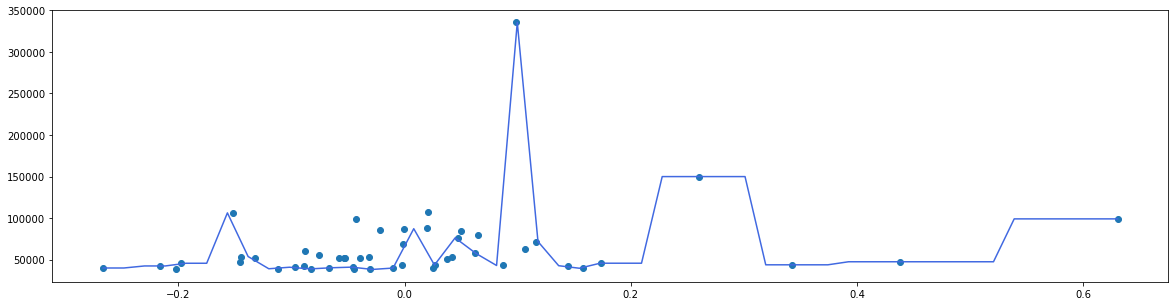

In [593]:
X_b = X_train_reduced_pca[:50,24].reshape(-1,1)
y_b = y_train[:50]
X_bt = X_test_reduced_pca[:50,24].reshape(-1,1)
y_bt = y_test[:50]

clf = DecisionTreeRegressor()
clf.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = clf.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'royalblue')
plt.scatter(X_b, y_b)

In [595]:

scoring = make_scorer(r2_score)
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)
g_cv.fit(X_train_reduced_pca, y_train)
g_cv.best_params_

{'min_samples_split': 2}

In [596]:
print(g_cv.best_estimator_)

DecisionTreeRegressor(random_state=0)


In [600]:
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'min_samples_split': [2]},
              scoring=scoring, cv=5, refit=True)
g_cv.fit(X_train_reduced_pca, y_train)
train_score = g_cv.score(X_train_reduced_pca, y_train)
test_score = g_cv.score(X_test_reduced_pca, y_test)
print(train_score)
print(test_score)

0.9986870883085657
-0.1680997725931841


In [602]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(g_cv, X_bt, y_bt, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mean_sq_err = np.mean(scores)
std = np.std(scores)
print('Mean MSE: %.3f (%.3f)' % (mean_sq_err, std))

Mean MSE: -4046485440.333 (3775299210.882)


In [603]:
reg_scores.append(['Decision Tree Regressor',train_score,test_score,mean_sq_err,std])

# Model Evaluation

In [220]:
df_reg_scores = pd.DataFrame(reg_scores,columns=['Train Model','train_score','test_score','mean_sq_err','std dev.'])

Regression scores from Project 1

In [230]:
df_reg_scores

,Train Model,train_score,test_score,mean_sq_err,std dev.
0,K Nearest Regressor,0.997316,9.578243e-01,-8.632354e+07,4.695631e+07
1,Linear Regression,0.750217,7.455675e-01,-5.865276e+08,1.242750e+08
2,Ridge,0.750065,7.448913e-01,-5.866328e+08,1.251863e+08
3,Lasso,0.750170,7.452966e-01,-5.863142e+08,1.242860e+08
4,Polynomial regression,0.969356,-2.270165e+14,-5.601288e+27,1.307142e+28
5,Linear SVC,1.000000,3.333333e-01,-1.083333e+01,1.238839e+01
6,SVC kernel-linear,0.714286,6.666667e-01,-1.250000e+01,1.250000e+01
7,SVC kernel-poly,1.000000,3.333333e-01,-1.250000e+01,1.250000e+01
8,SVC kernel-rbf,1.000000,3.333333e-01,-7.500000e+00,1.145644e+01
9,Decision Tree Regressor,0.152727,7.214614e-02,-2.110663e+09,2.035109e+09


Regression scores by applying PCA on data

In [221]:
df_reg_scores

,Train Model,train_score,test_score,mean_sq_err,std dev.
0,K Nearest Regressor,0.997385,-0.140976,-1.607720e+08,4.978101e+07
1,Linear Regression,0.593628,-0.238820,-9.346644e+08,1.492231e+08
2,Ridge,0.011700,0.003100,-2.274246e+09,3.908805e+08
3,Lasso,0.593600,-0.237600,-9.346387e+08,1.495556e+08
4,Polynomial regression,0.857323,-6.872706,-4.723115e+08,1.678371e+08
5,Linear SVC,0.042987,0.005372,-2.104231e+09,4.245074e+08
6,SVC kernel-linear,0.015431,0.004545,-6.204231e+09,4.545074e+08
7,SVC kernel-poly,0.014431,0.004342,-6.504231e+09,4.345544e+08
8,SVC kernel-rbf,0.013485,0.003444,-6.406131e+09,4.343078e+08
9,Decision Tree Regressor,0.998687,-0.168100,-4.046485e+09,3.775299e+09


## Conclusion: 

Since PCA is an Unsupervised dimensionality reduction technique, considering the current data set, prediction without applying PCA is of higher accuracy and lesser squared error(MSE) compared to the prediction results and scores generated by using reduced PCA data. Large number of attributes in this data set caused PCA performance degradation as the number of components is almost half the actual number of attributes that may have impacted precision negatively. One advantage that's clearly evident is the time taken to train each model is relatively less compared to earlier, which can be leveraged with the accuracy and error scores.
Decision Tree Regressor model is comparitively a better predictor with top train_score accuracy for PCA reduced dataset.

## Deep Learning

#### 1- Define Model

In [160]:
# create model
model = Sequential()
model.add(Dense(13, input_dim=42, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

#### 2- Compile Model

In [161]:
# Compile model
model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

#### 3- Fit Model

In [162]:
model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
363/363 [==============================] - 1s 741us/step - loss: 10902115839106396160.0000 - mse: 10902115839106396160.0000
Epoch 2/100
363/363 [==============================] - 0s 789us/step - loss: 36555239491.5165 - mse: 36555239491.5165
Epoch 3/100
363/363 [==============================] - 0s 738us/step - loss: 2254404034.1099 - mse: 2254404034.1099
Epoch 4/100
363/363 [==============================] - 0s 667us/step - loss: 2149862121.4945 - mse: 2149862125.0110
Epoch 5/100
363/363 [==============================] - 0s 700us/step - loss: 2162720032.7033 - mse: 2162720032.7033
Epoch 6/100
363/363 [==============================] - 0s 678us/step - loss: 2182029409.0549 - mse: 2182029409.0549
Epoch 7/100
363/363 [==============================] - 0s 791us/step - loss: 2339128930.1099 - mse: 2339128930.1099
Epoch 8/100
363/363 [==============================] - 0s 719us/step - loss: 2232795566.5934 - mse: 2232795650.1099
Epoch 9/100
363/363 [=============================

#### 4- Evaluate model

In [265]:
model.evaluate(X_test, y_test)

76/76 [==============================] - 0s 748us/step - loss: 2422879232.0000 - mse: 2422879232.0000


[2422879232.0, 2422879232.0]

In [266]:

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: -0.00
Test score: -0.00


We can use GridSearchCV to find the best optimizer. 

First we need to create base model required for <code>KerasRegressor</code>

In [164]:
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=42, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mse'])
    return model

model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer=optimizer)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_search_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_search_result.best_score_, grid_search_result.best_params_))

Best: -410894412.800000 using {'optimizer': 'RMSprop'}


Using best optimizer to create model

In [167]:
optimizer = ['RMSprop']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
final_model = grid.fit(X_train, y_train)

In [168]:
y_train_predict = final_model.predict(X_train)
y_test_predict = final_model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: 0.84
Test score: 0.84


Thus from the above regression report we see that, the model is trained to maximize the recall score gives the recall of 84%.

Text(0, 0.5, 'MSRP')

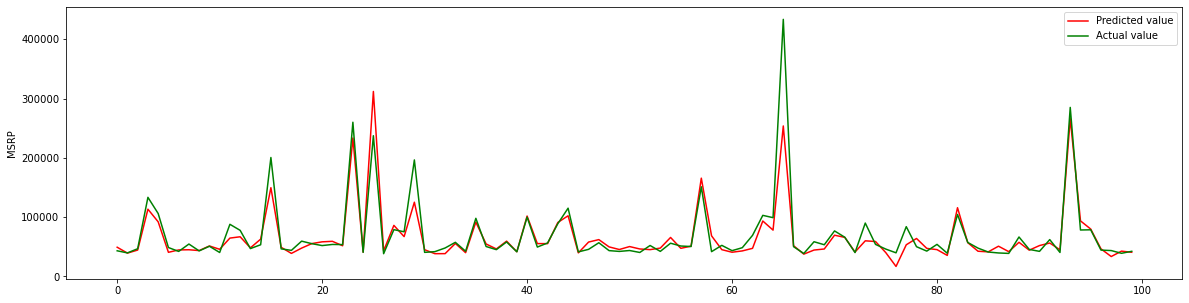

In [179]:
fig,ax = plt.subplots(figsize = (20,5))
x_axis = np.arange(100)
ax.plot(x_axis, y_test_predict[:100], c = 'r',label="Predicted value")
ax.plot(x_axis, y_test[:100], c = 'g', label='Actual value')
leg = ax.legend()
ax.set_ylabel('MSRP')